Plotted 419190 pixels for NGC4501
log(SFR) range: -4.17 to -0.07


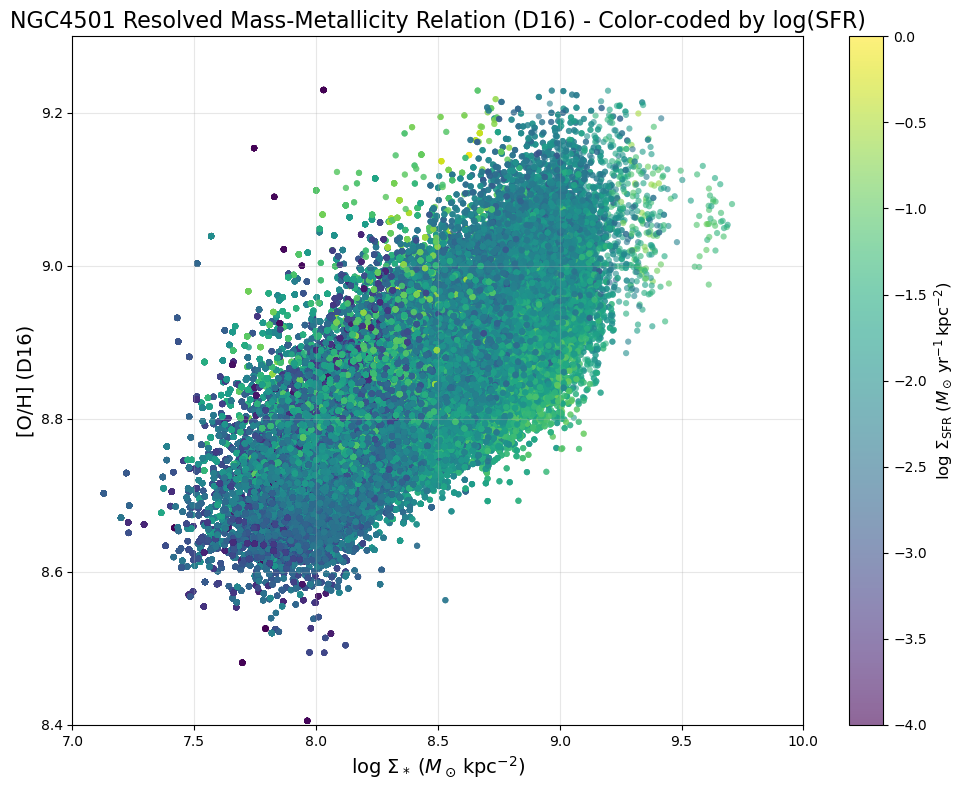

Successfully plotted spatially-resolved MZR for NGC4501 with log(SFR) color-coding


In [1]:
# ------------------------------------------------------------------
# NGC4501 Resolved MZR (D16) - Color-coded by log(SFR)
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from astropy.wcs import WCS


def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and D16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
    return sigM, sigSFR_SF, oh_d16

# Create single plot figure
fig, ax = plt.subplots(figsize=(10, 8))

# Focus on NGC4501 only
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps using the provided function
    logSigmaM, logSigmaSFR, oh_d16 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_d16) & np.isfinite(logSigmaSFR)

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM[good],
        oh_d16[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=0,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (D16)', fontsize=14)
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (D16) - Color-coded by log(SFR)', fontsize=16)
ax.set_xlim(7, 10)
ax.set_ylim(8.4, 9.3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with log(SFR) color-coding")

Plotted 419179 pixels for NGC4501
log(SFR) range: -4.17 to -0.07


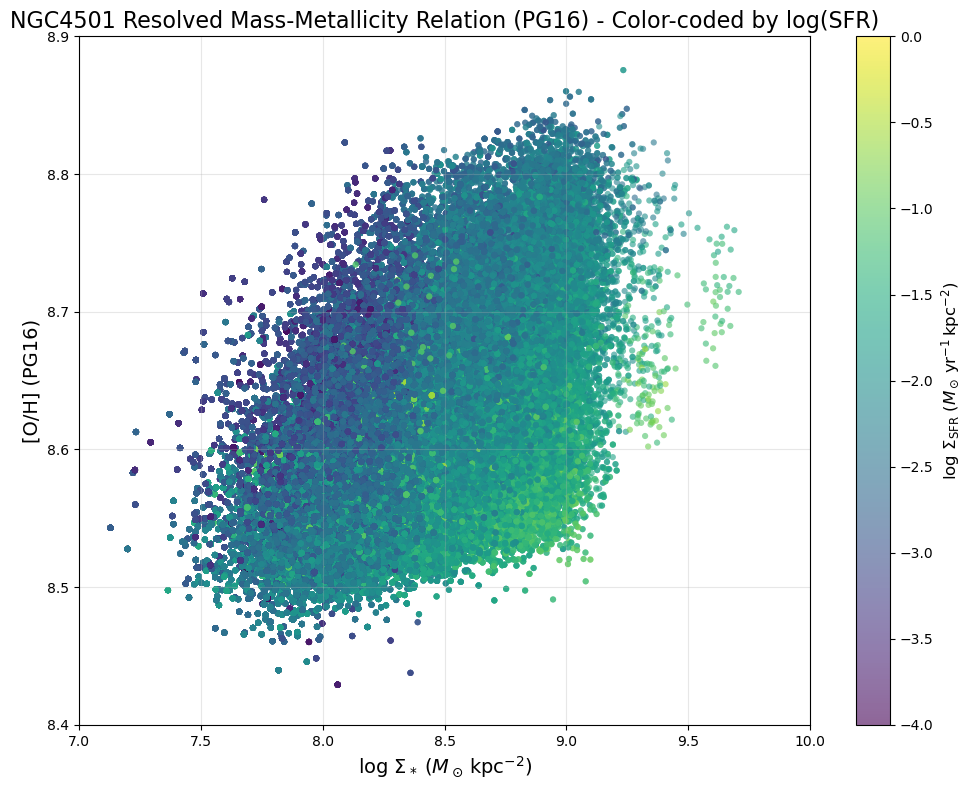

Successfully plotted spatially-resolved MZR for NGC4501 with PG16 metallicity and log(SFR) color-coding


In [2]:
# Update from D16 to PG16 metallicity
def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and PG16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data  # Changed from D16 to PG16
    return sigM, sigSFR_SF, oh_pg16

# Create new plot figure
fig, ax = plt.subplots(figsize=(10, 8))

if bin_file.exists() and gas_file.exists():
    # Load maps with PG16 metallicity
    logSigmaM, logSigmaSFR, oh_pg16 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_pg16) & np.isfinite(logSigmaSFR)

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM[good],
        oh_pg16[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=0,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (PG16)', fontsize=14)  # Updated label
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (PG16) - Color-coded by log(SFR)', fontsize=16)  # Updated title
ax.set_xlim(7, 10)
ax.set_ylim(8.4, 8.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with PG16 metallicity and log(SFR) color-coding")

Plotted 419360 pixels for NGC4501
log(SFR) range: -4.17 to -0.07


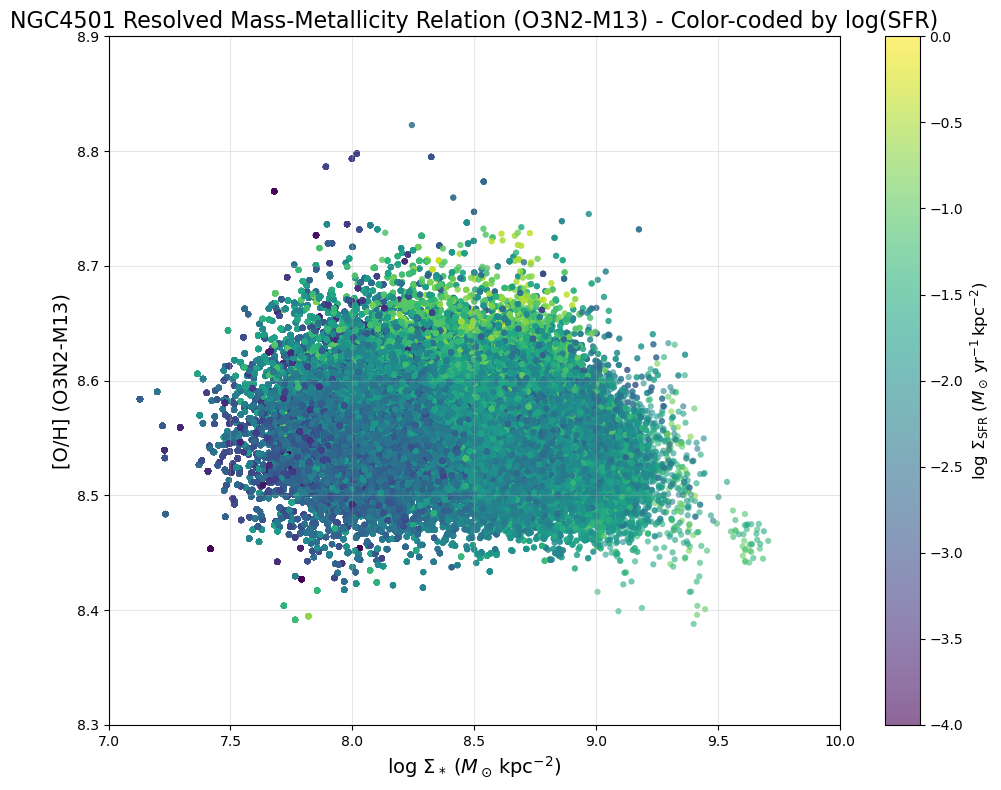

Successfully plotted spatially-resolved MZR for NGC4501 with O3N2-M13 metallicity and log(SFR) color-coding


In [3]:
# Update from PG16 to O3N2-M13 metallicity
def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and O3N2-M13 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data  # Changed from PG16 to O3N2-M13
    return sigM, sigSFR_SF, oh_o3n2_m13

# Create new plot figure
fig, ax = plt.subplots(figsize=(10, 8))

if bin_file.exists() and gas_file.exists():
    # Load maps with O3N2-M13 metallicity
    logSigmaM, logSigmaSFR, oh_o3n2_m13 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_o3n2_m13) & np.isfinite(logSigmaSFR)

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM[good],
        oh_o3n2_m13[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=0,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (O3N2-M13)', fontsize=14)  # Updated label
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (O3N2-M13) - Color-coded by log(SFR)', fontsize=16)  # Updated title
ax.set_xlim(7, 10)
ax.set_ylim(8.3, 8.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with O3N2-M13 metallicity and log(SFR) color-coding")

Plotted 419360 pixels for NGC4501
log(SFR) range: -4.17 to -0.07


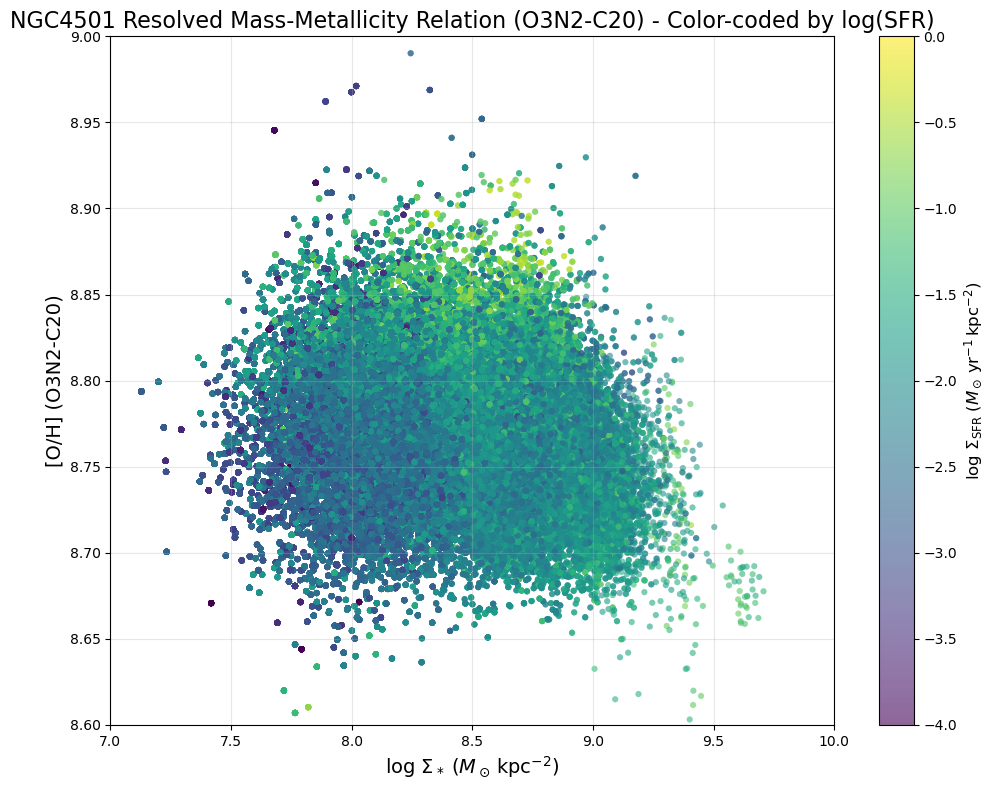

Successfully plotted spatially-resolved MZR for NGC4501 with O3N2-C20 metallicity and log(SFR) color-coding


In [4]:
# Update from O3N2-M13 to O3N2-C20 metallicity
def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and O3N2-C20 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data  # Changed from O3N2-M13 to O3N2-C20
    return sigM, sigSFR_SF, oh_o3n2_c20

# Create new plot figure
fig, ax = plt.subplots(figsize=(10, 8))

if bin_file.exists() and gas_file.exists():
    # Load maps with O3N2-C20 metallicity
    logSigmaM, logSigmaSFR, oh_o3n2_c20 = load_maps(gal)
    
    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_o3n2_c20) & np.isfinite(logSigmaSFR)

    # Create scatter plot color-coded by log(SFR)
    scatter = ax.scatter(
        logSigmaM[good],
        oh_o3n2_c20[good],
        c=logSigmaSFR[good],
        s=20, 
        alpha=0.6,
        cmap='viridis',
        vmin=-4,
        vmax=0,
        edgecolors='none'
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=12)
    
    print(f"Plotted {np.sum(good)} pixels for {gal}")
    print(f"log(SFR) range: {logSigmaSFR[good].min():.2f} to {logSigmaSFR[good].max():.2f}")
    
else:
    print(f"Data files not found for {gal}")

# Final cosmetics
ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
ax.set_ylabel(r'[O/H] (O3N2-C20)', fontsize=14)  # Updated label
ax.set_title(f'{gal} Resolved Mass-Metallicity Relation (O3N2-C20) - Color-coded by log(SFR)', fontsize=16)  # Updated title
ax.set_xlim(7, 10)
ax.set_ylim(8.6, 9.0)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Successfully plotted spatially-resolved MZR for {gal} with O3N2-C20 metallicity and log(SFR) color-coding")

D16: Plotted 419190 pixels
PG16: Plotted 419179 pixels
O3N2-M13: Plotted 419360 pixels
O3N2-C20: Plotted 419360 pixels
O3N2-M13: Plotted 419360 pixels
O3N2-C20: Plotted 419360 pixels


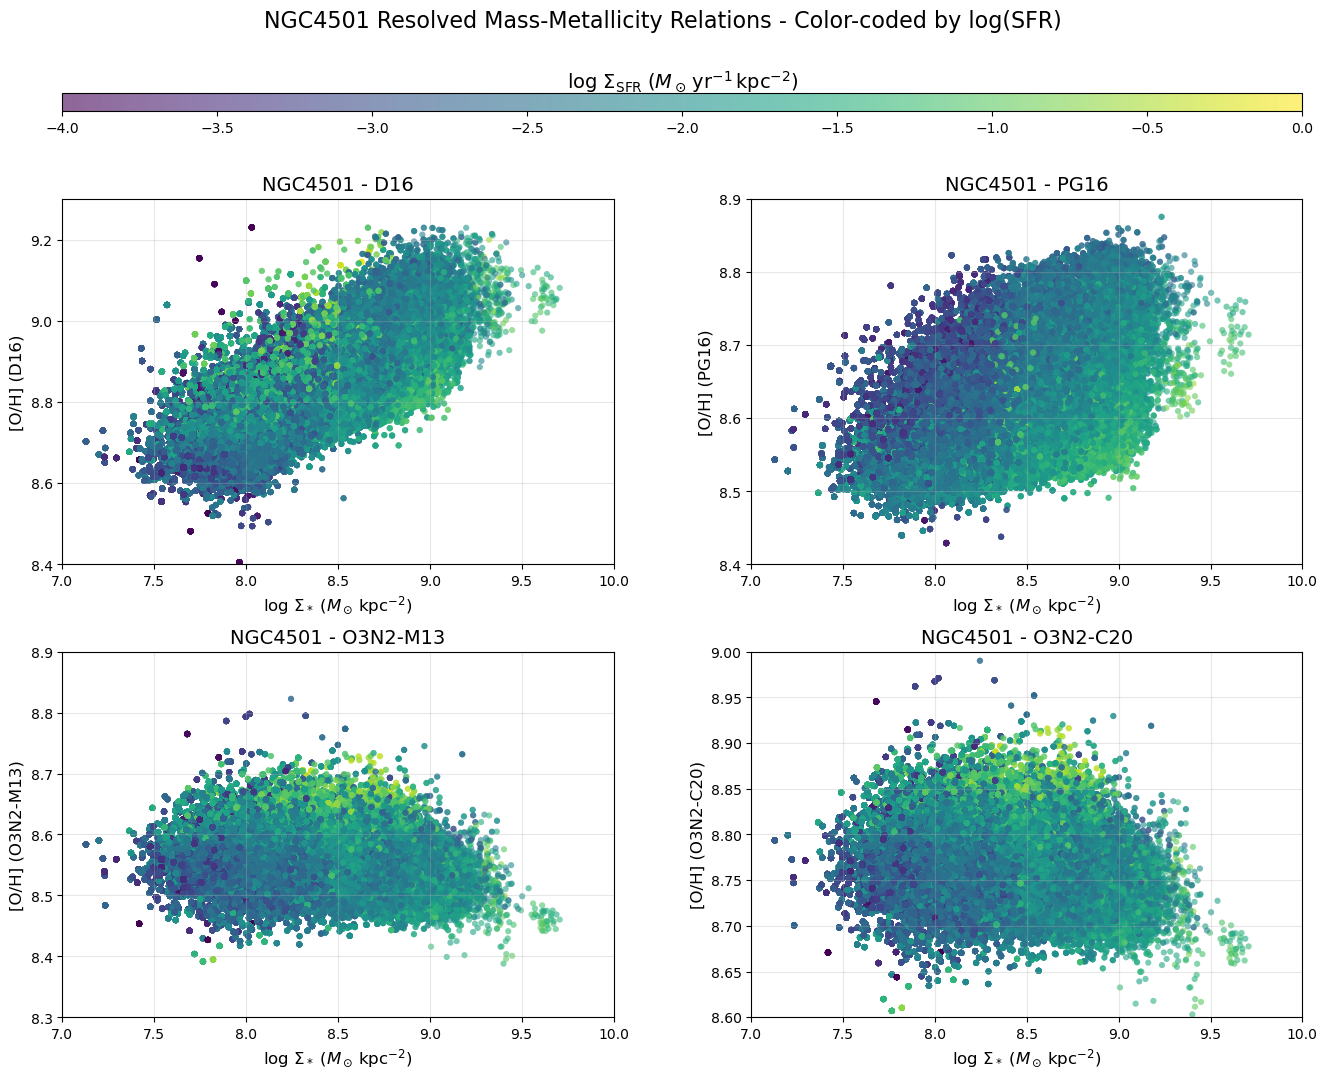


Successfully created combined plot with 4 metallicity calibrations for NGC4501


In [5]:
# Combined plot with 4 metallicity calibrations
# 2x2 subplots with shared horizontal colorbar at top

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from astropy.io import fits

def load_maps_all_calibrations(gal):
    """Load all metallicity calibrations for a galaxy"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data
    return sigM, sigSFR_SF, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20

# Setup
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load all data
    logSigmaM, logSigmaSFR, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20 = load_maps_all_calibrations(gal)
    
    # Create figure with 2x2 subplots and space for colorbar
    fig = plt.figure(figsize=(16, 12))
    
    # Create a grid layout: colorbar at top, then 2x2 subplots
    gs = fig.add_gridspec(3, 2, height_ratios=[0.05, 1, 1], hspace=0.35, wspace=0.25)
    
    # Colorbar axis (spans full width at top)
    cbar_ax = fig.add_subplot(gs[0, :])
    
    # Subplot axes
    ax1 = fig.add_subplot(gs[1, 0])  # Top left - D16
    ax2 = fig.add_subplot(gs[1, 1])  # Top right - PG16
    ax3 = fig.add_subplot(gs[2, 0])  # Bottom left - O3N2-M13
    ax4 = fig.add_subplot(gs[2, 1])  # Bottom right - O3N2-C20
    
    # Data for each calibration
    calibrations = [
        (oh_d16, 'D16', (8.4, 9.3), ax1),
        (oh_pg16, 'PG16', (8.4, 8.9), ax2),
        (oh_o3n2_m13, 'O3N2-M13', (8.3, 8.9), ax3),
        (oh_o3n2_c20, 'O3N2-C20', (8.6, 9.0), ax4)
    ]
    
    # Create scatter plots for each calibration
    scatters = []
    for oh_data, calib_name, ylim, ax in calibrations:
        # Mask bad pixels
        good = np.isfinite(logSigmaM) & np.isfinite(oh_data) & np.isfinite(logSigmaSFR)
        
        # Create scatter plot
        scatter = ax.scatter(
            logSigmaM[good],
            oh_data[good],
            c=logSigmaSFR[good],
            s=20,
            alpha=0.6,
            cmap='viridis',
            vmin=-4,
            vmax=0,
            edgecolors='none'
        )
        scatters.append(scatter)
        
        # Formatting
        ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=12)
        ax.set_ylabel(f'[O/H] ({calib_name})', fontsize=12)
        ax.set_title(f'{gal} - {calib_name}', fontsize=14)
        ax.set_xlim(7, 10)
        ax.set_ylim(ylim)
        ax.grid(True, alpha=0.3)
        
        print(f"{calib_name}: Plotted {np.sum(good)} pixels")
    
    # Add shared colorbar at the top
    cbar = fig.colorbar(scatters[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', 
                   fontsize=14)
    cbar.ax.xaxis.set_label_position('top')
    
    # Add overall title
    fig.suptitle(f'{gal} Resolved Mass-Metallicity Relations - Color-coded by log(SFR)', 
                 fontsize=16, y=0.95)
    
    plt.show()
    
    print(f"\nSuccessfully created combined plot with 4 metallicity calibrations for {gal}")
    
else:
    print(f"Data files not found for {gal}")

D16: Plotted 419190 pixels in hexagonal bins
PG16: Plotted 419179 pixels in hexagonal bins
O3N2-M13: Plotted 419360 pixels in hexagonal bins
PG16: Plotted 419179 pixels in hexagonal bins
O3N2-M13: Plotted 419360 pixels in hexagonal bins
O3N2-C20: Plotted 419360 pixels in hexagonal bins
O3N2-C20: Plotted 419360 pixels in hexagonal bins


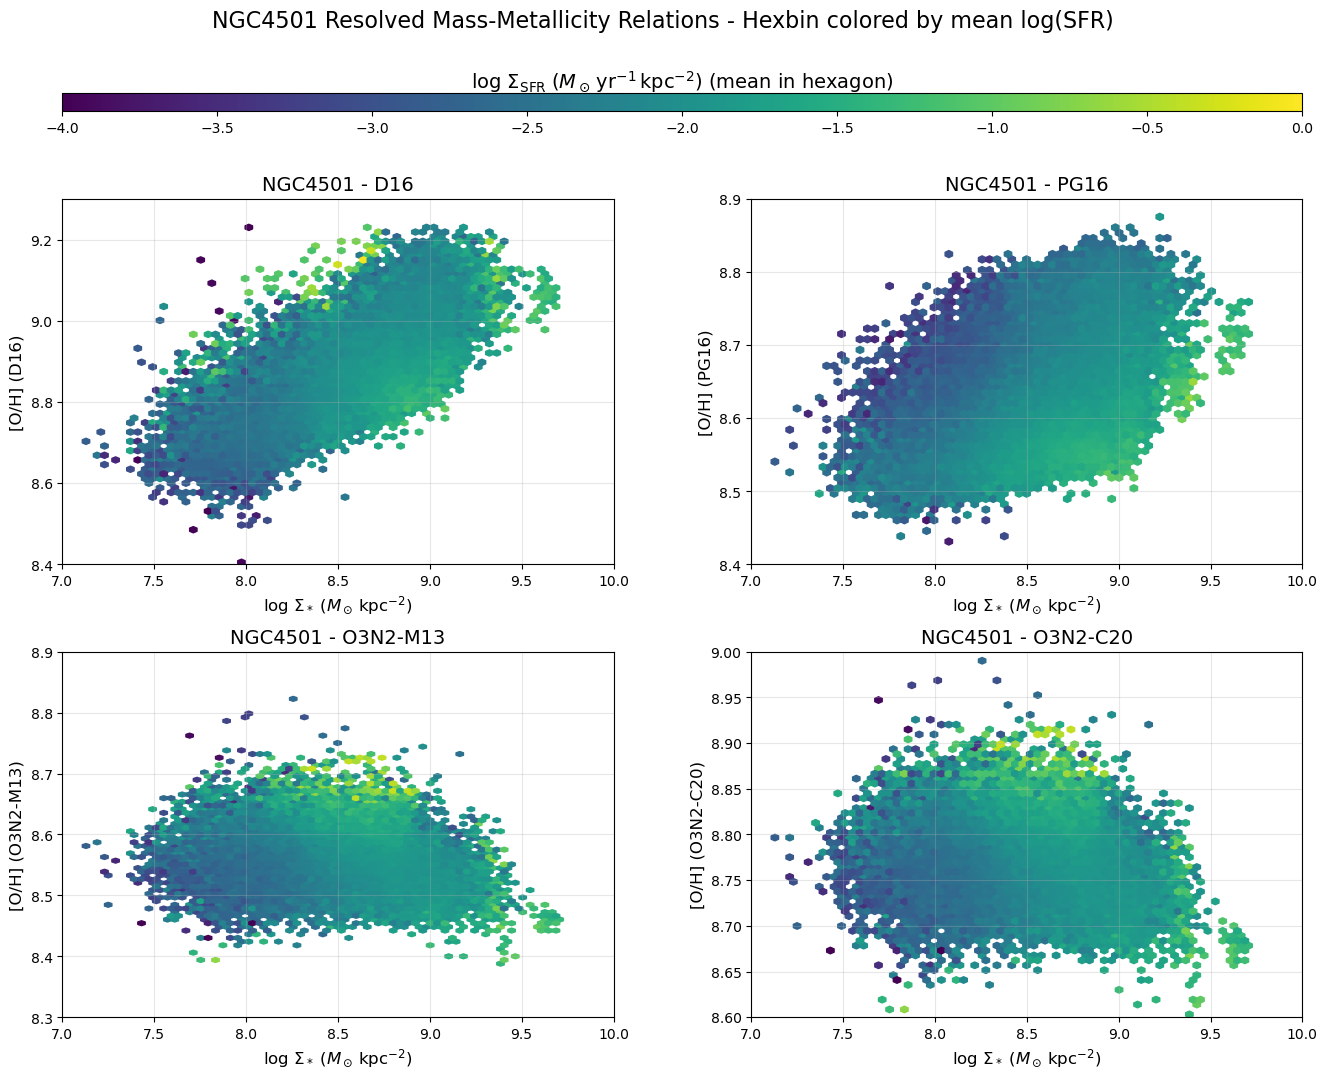


Successfully created combined hexbin plot with 4 metallicity calibrations for NGC4501


In [6]:
# Combined plot with 4 metallicity calibrations using hexagon plots
# 2x2 subplots with shared horizontal colorbar at top

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from astropy.io import fits

def load_maps_all_calibrations(gal):
    """Load all metallicity calibrations for a galaxy"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data
    return sigM, sigSFR_SF, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20

# Setup
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load all data
    logSigmaM, logSigmaSFR, oh_d16, oh_pg16, oh_o3n2_m13, oh_o3n2_c20 = load_maps_all_calibrations(gal)
    
    # Create figure with 2x2 subplots and space for colorbar
    fig = plt.figure(figsize=(16, 12))
    
    # Create a grid layout: colorbar at top, then 2x2 subplots
    gs = fig.add_gridspec(3, 2, height_ratios=[0.05, 1, 1], hspace=0.35, wspace=0.25)
    
    # Colorbar axis (spans full width at top)
    cbar_ax = fig.add_subplot(gs[0, :])
    
    # Subplot axes
    ax1 = fig.add_subplot(gs[1, 0])  # Top left - D16
    ax2 = fig.add_subplot(gs[1, 1])  # Top right - PG16
    ax3 = fig.add_subplot(gs[2, 0])  # Bottom left - O3N2-M13
    ax4 = fig.add_subplot(gs[2, 1])  # Bottom right - O3N2-C20
    
    # Data for each calibration
    calibrations = [
        (oh_d16, 'D16', (8.4, 9.3), ax1),
        (oh_pg16, 'PG16', (8.4, 8.9), ax2),
        (oh_o3n2_m13, 'O3N2-M13', (8.3, 8.9), ax3),
        (oh_o3n2_c20, 'O3N2-C20', (8.6, 9.0), ax4)
    ]
    
    # Create hexagon plots for each calibration
    hexbins = []
    for oh_data, calib_name, ylim, ax in calibrations:
        # Mask bad pixels
        good = np.isfinite(logSigmaM) & np.isfinite(oh_data) & np.isfinite(logSigmaSFR)
        
        # Create hexbin plot with SFR as color (using reduce_C_function='mean' for average SFR in each hexagon)
        hexbin = ax.hexbin(
            logSigmaM[good],
            oh_data[good],
            C=logSigmaSFR[good],
            gridsize=64,
            cmap='viridis',
            vmin=-4,
            vmax=0,
            reduce_C_function=np.mean,
            mincnt=1  # Only show hexagons with at least 1 data point
        )
        hexbins.append(hexbin)
        
        # Formatting
        ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=12)
        ax.set_ylabel(f'[O/H] ({calib_name})', fontsize=12)
        ax.set_title(f'{gal} - {calib_name}', fontsize=14)
        ax.set_xlim(7, 10)
        ax.set_ylim(ylim)
        ax.grid(True, alpha=0.3)
        
        print(f"{calib_name}: Plotted {np.sum(good)} pixels in hexagonal bins")
    
    # Add shared colorbar at the top
    cbar = fig.colorbar(hexbins[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$ (mean in hexagon)', 
                   fontsize=14)
    cbar.ax.xaxis.set_label_position('top')
    
    # Add overall title
    fig.suptitle(f'{gal} Resolved Mass-Metallicity Relations - Hexbin colored by mean log(SFR)', 
                 fontsize=16, y=0.95)
    
    plt.show()
    
    print(f"\nSuccessfully created combined hexbin plot with 4 metallicity calibrations for {gal}")
    
else:
    print(f"Data files not found for {gal}")

## Divided into different $\Sigma_{\mathrm{SFR}}$ bin

Σ_SFR bins: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0. ]
Bin centers: [-3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25]
Bin -4.0 to -3.5: N=3207 pixels
Bin -3.5 to -3.0: N=29396 pixels
Bin -3.0 to -2.5: N=99302 pixels
Bin -2.5 to -2.0: N=150425 pixels
Bin -2.0 to -1.5: N=103135 pixels
Bin -1.5 to -1.0: N=29894 pixels
Bin -1.0 to -0.5: N=3510 pixels
Bin -0.5 to 0.0: N=170 pixels


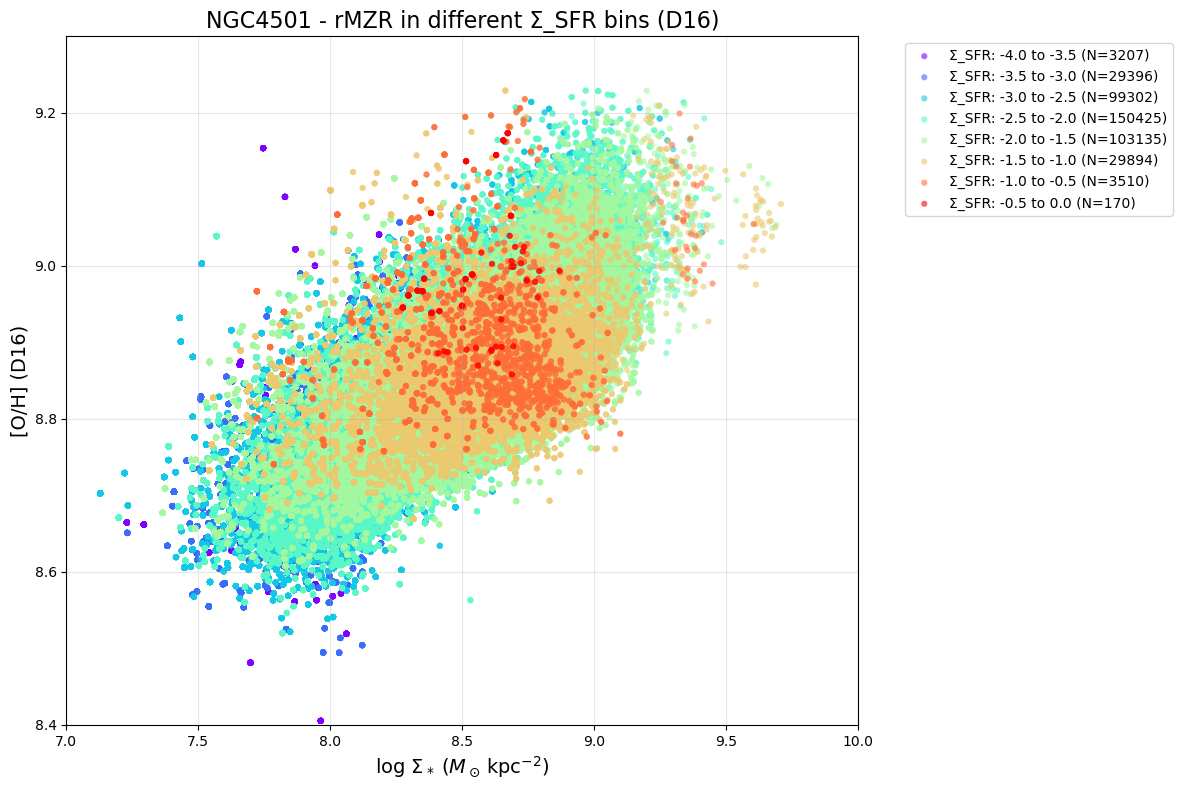


Analysis complete for NGC4501 rMZR behavior in Σ_SFR bins (D16 only)


In [7]:
# ------------------------------------------------------------------
# NGC4501 rMZR behavior in Σ_SFR bins (D16 only)
# Σ_SFR bins: -4 to 1 with 0.5 bin width
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and D16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
    return sigM, sigSFR_SF, oh_d16

# Focus on NGC4501 only - D16 metallicity
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps
    logSigmaM, logSigmaSFR, oh_d16 = load_maps(gal)

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_d16) & np.isfinite(logSigmaSFR)
    
    logSigmaSFR_good = logSigmaSFR[good]
    oh_d16_good = oh_d16[good]
    
    # Define Σ_SFR bins: -4 to 1 with 0.5 bin width
    sfr_bin_edges = np.arange(-4, 0.5, 0.5)  # Creates bins: [-4, -3.5], [-3.5, -3], etc.
    sfr_bin_centers = sfr_bin_edges[:-1] + 0.25  # Center of each bin
    n_bins = len(sfr_bin_centers)
    
    print(f"Σ_SFR bins: {sfr_bin_edges}")
    print(f"Bin centers: {sfr_bin_centers}")
    
    # Colors for different bins
    colors = plt.cm.rainbow(np.linspace(0, 1, n_bins))
    
    # Create single combined plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for i, (bin_start, bin_end) in enumerate(zip(sfr_bin_edges[:-1], sfr_bin_edges[1:])):
        # Select pixels in this Σ_SFR bin
        in_bin = (logSigmaSFR_good >= bin_start) & (logSigmaSFR_good < bin_end)
        n_pixels = np.sum(in_bin)
        
        if n_pixels < 10:  # Skip bins with too few pixels
            print(f"Bin {bin_start:.1f} to {bin_end:.1f}: only {n_pixels} pixels, skipping")
            continue
            
        # Get data for this bin
        x_bin = logSigmaM[good][in_bin]
        y_bin = oh_d16_good[in_bin]
        
        # Add to plot
        ax.scatter(x_bin, y_bin, c=[colors[i]], s=20, alpha=0.6, 
                  label=f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f} (N={n_pixels})',
                  edgecolors='none')
        
        print(f"Bin {bin_start:.1f} to {bin_end:.1f}: N={n_pixels} pixels")
    
    # Plot formatting
    ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
    ax.set_ylabel(r'[O/H] (D16)', fontsize=14)
    ax.set_title(f'{gal} - rMZR in different Σ_SFR bins (D16)', fontsize=16)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(7, 10)
    ax.set_ylim(8.4, 9.3)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Data files not found for {gal}")

print(f"\nAnalysis complete for {gal} rMZR behavior in Σ_SFR bins (D16 only)")

Σ_M bins: [ 7.   7.5  8.   8.5  9.   9.5 10. ]
Bin centers: [7.25 7.75 8.25 8.75 9.25 9.75]
Bin 7.0 to 7.5: N=2895 pixels
Bin 7.5 to 8.0: N=106119 pixels
Bin 8.0 to 8.5: N=200667 pixels
Bin 8.5 to 9.0: N=103807 pixels
Bin 9.0 to 9.5: N=5663 pixels
Bin 9.5 to 10.0: N=39 pixels


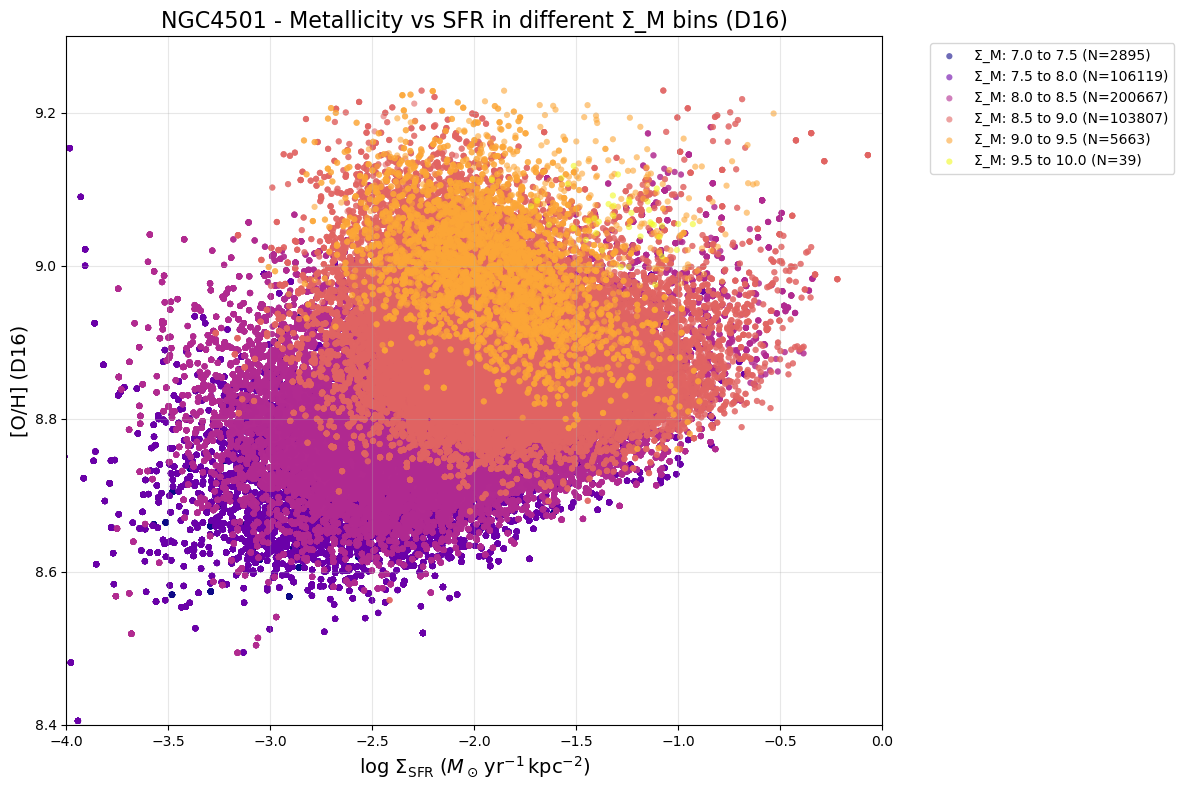


Analysis complete for NGC4501 metallicity vs SFR behavior in Σ_M bins (D16 only)


In [8]:
# ------------------------------------------------------------------
# NGC4501 rMZR behavior in stellar mass surface density bins (D16 only)
# Mass bins: 7 to 10 with 0.5 bin width
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and D16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
    return sigM, sigSFR_SF, oh_d16

# Focus on NGC4501 only - D16 metallicity
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps
    logSigmaM, logSigmaSFR, oh_d16 = load_maps(gal)

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_d16) & np.isfinite(logSigmaSFR)
    
    logSigmaSFR_good = logSigmaSFR[good]
    oh_d16_good = oh_d16[good]
    
    # Define stellar mass surface density bins: 7 to 10 with 0.5 bin width
    mass_bin_edges = np.arange(7, 10.5, 0.5)  # Creates bins: [7, 7.5], [7.5, 8], etc.
    mass_bin_centers = mass_bin_edges[:-1] + 0.25  # Center of each bin
    n_bins = len(mass_bin_centers)
    
    print(f"Σ_M bins: {mass_bin_edges}")
    print(f"Bin centers: {mass_bin_centers}")
    
    # Colors for different bins
    colors = plt.cm.plasma(np.linspace(0, 1, n_bins))
    
    # Create single combined plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for i, (bin_start, bin_end) in enumerate(zip(mass_bin_edges[:-1], mass_bin_edges[1:])):
        # Select pixels in this Σ_M bin
        in_bin = (logSigmaM[good] >= bin_start) & (logSigmaM[good] < bin_end)
        n_pixels = np.sum(in_bin)
        
        if n_pixels < 10:  # Skip bins with too few pixels
            print(f"Bin {bin_start:.1f} to {bin_end:.1f}: only {n_pixels} pixels, skipping")
            continue
            
        # Get data for this bin
        x_bin = logSigmaSFR_good[in_bin]  # SFR on x-axis
        y_bin = oh_d16_good[in_bin]       # Metallicity on y-axis
        
        # Add to plot
        ax.scatter(x_bin, y_bin, c=[colors[i]], s=20, alpha=0.6, 
                  label=f'Σ_M: {bin_start:.1f} to {bin_end:.1f} (N={n_pixels})',
                  edgecolors='none')
        
        print(f"Bin {bin_start:.1f} to {bin_end:.1f}: N={n_pixels} pixels")
    
    # Plot formatting
    ax.set_xlabel(r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$', fontsize=14)
    ax.set_ylabel(r'[O/H] (D16)', fontsize=14)
    ax.set_title(f'{gal} - Metallicity vs SFR in different Σ_M bins (D16)', fontsize=16)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-4, 0)
    ax.set_ylim(8.4, 9.3)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Data files not found for {gal}")

print(f"\nAnalysis complete for {gal} metallicity vs SFR behavior in Σ_M bins (D16 only)")

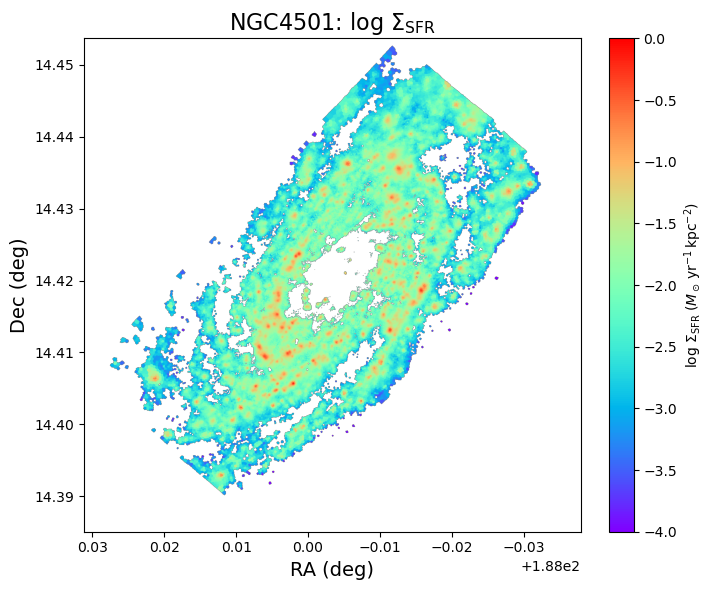

In [9]:
# ------------------------------------------------------------------
# 0.  List galaxies and pin one colour to each
# ------------------------------------------------------------------
bin_maps = sorted(Path('.').glob('*_SPATIAL_BINNING_maps_extended.fits'))
galaxies = ['NGC4501']        # auto-detect
cmap   = plt.get_cmap('tab20').colors                      # 20 hues
colour = {g: cmap[i % len(cmap)] for i, g in enumerate(galaxies)}

# ------------------------------------------------------------------
# 1.  Helper: read the two maps
# ------------------------------------------------------------------
def load_maps(gal):
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
        wcs = WCS(h['LOGMASS_SURFACE_DENSITY'].header)
        mass_header = h['LOGMASS_SURFACE_DENSITY'].header
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR = h['LOGSFR_SURFACE_DENSITY_SF'].data
        gas_header = h['LOGSFR_SURFACE_DENSITY_SF'].header
    return sigM, sigSFR, wcs, mass_header, gas_header

# Update the code to show only the middle panel (SFR map)
for gal in galaxies:
    sigM, sigSFR, wcs, mass_header, gas_header = load_maps(gal)
    good = np.isfinite(sigM) & np.isfinite(sigSFR)

    # Convert pixel area to physical area in pc²
    legacy_wcs2 = WCS(gas_header).celestial  # strip spectral axis
    
    # Get the extent from WCS for proper coordinate axes
    y_size, x_size = sigM.shape
    x_coords = np.arange(x_size)
    y_coords = np.arange(y_size)
    xx, yy = np.meshgrid(x_coords, y_coords)
    # Convert pixel coordinates to world coordinates
    ra, dec = legacy_wcs2.pixel_to_world_values(xx, yy)
    extent = [ra.max(), ra.min(), dec.min(), dec.max()]  # [left, right, bottom, top]

    fig = plt.figure(figsize=(8, 6))

    # --- Σ_SFR map only -----------------------------------------------
    ax = fig.add_subplot(1, 1, 1)
    im = ax.imshow(sigSFR, origin='lower', cmap='rainbow',extent=extent, vmin=-4, vmax=0)
    ax.set_title(rf'{gal}: $\log\,\Sigma_{{\mathrm{{SFR}}}}$', fontsize=16)
    ax.set_xlabel('RA (deg)', fontsize=14)
    ax.set_ylabel('Dec (deg)', fontsize=14)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, 
                label=r'$\log\,\Sigma_{\mathrm{SFR}} \; (M_\odot\,\mathrm{yr}^{-1}\,\mathrm{kpc}^{-2})$')

    plt.tight_layout()
    plt.show()


Σ_SFR bins: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0. ]
Bin centers: [-3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25]
Bin -4.0 to -3.5: N=3207 pixels
Bin -3.5 to -3.0: N=29396 pixels
Bin -3.0 to -2.5: N=99302 pixels
Bin -2.5 to -2.0: N=150425 pixels
Bin -2.0 to -1.5: N=103135 pixels
Bin -1.5 to -1.0: N=29894 pixels
Bin -1.0 to -0.5: N=3510 pixels
Bin -0.5 to 0.0: N=170 pixels


/var/folders/rm/clp89v210v32vh5vjt2kx7b80000gr/T/ipykernel_68553/3927687186.py:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')


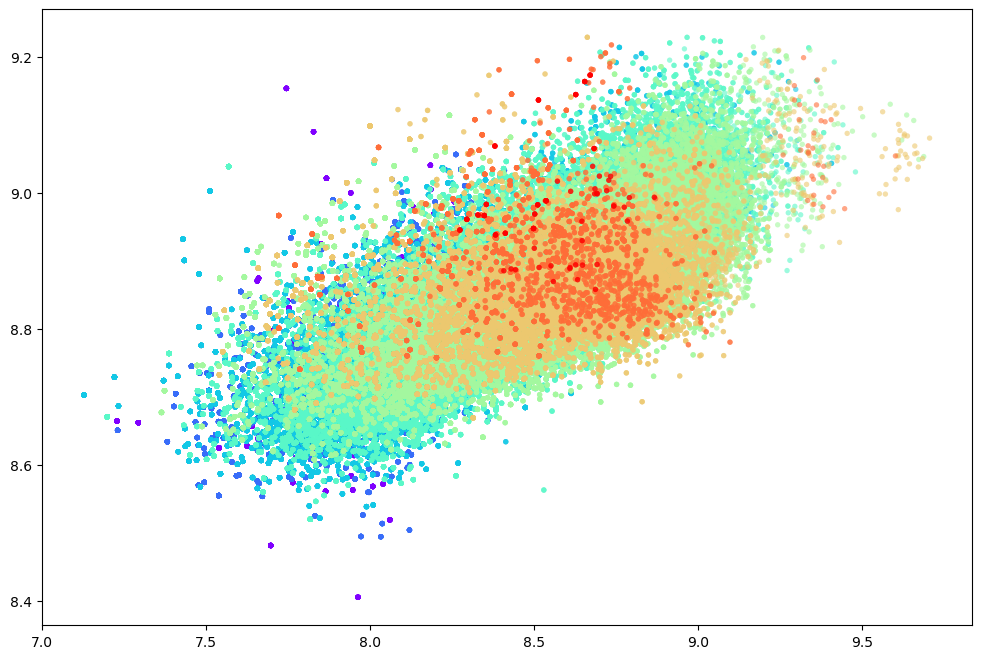

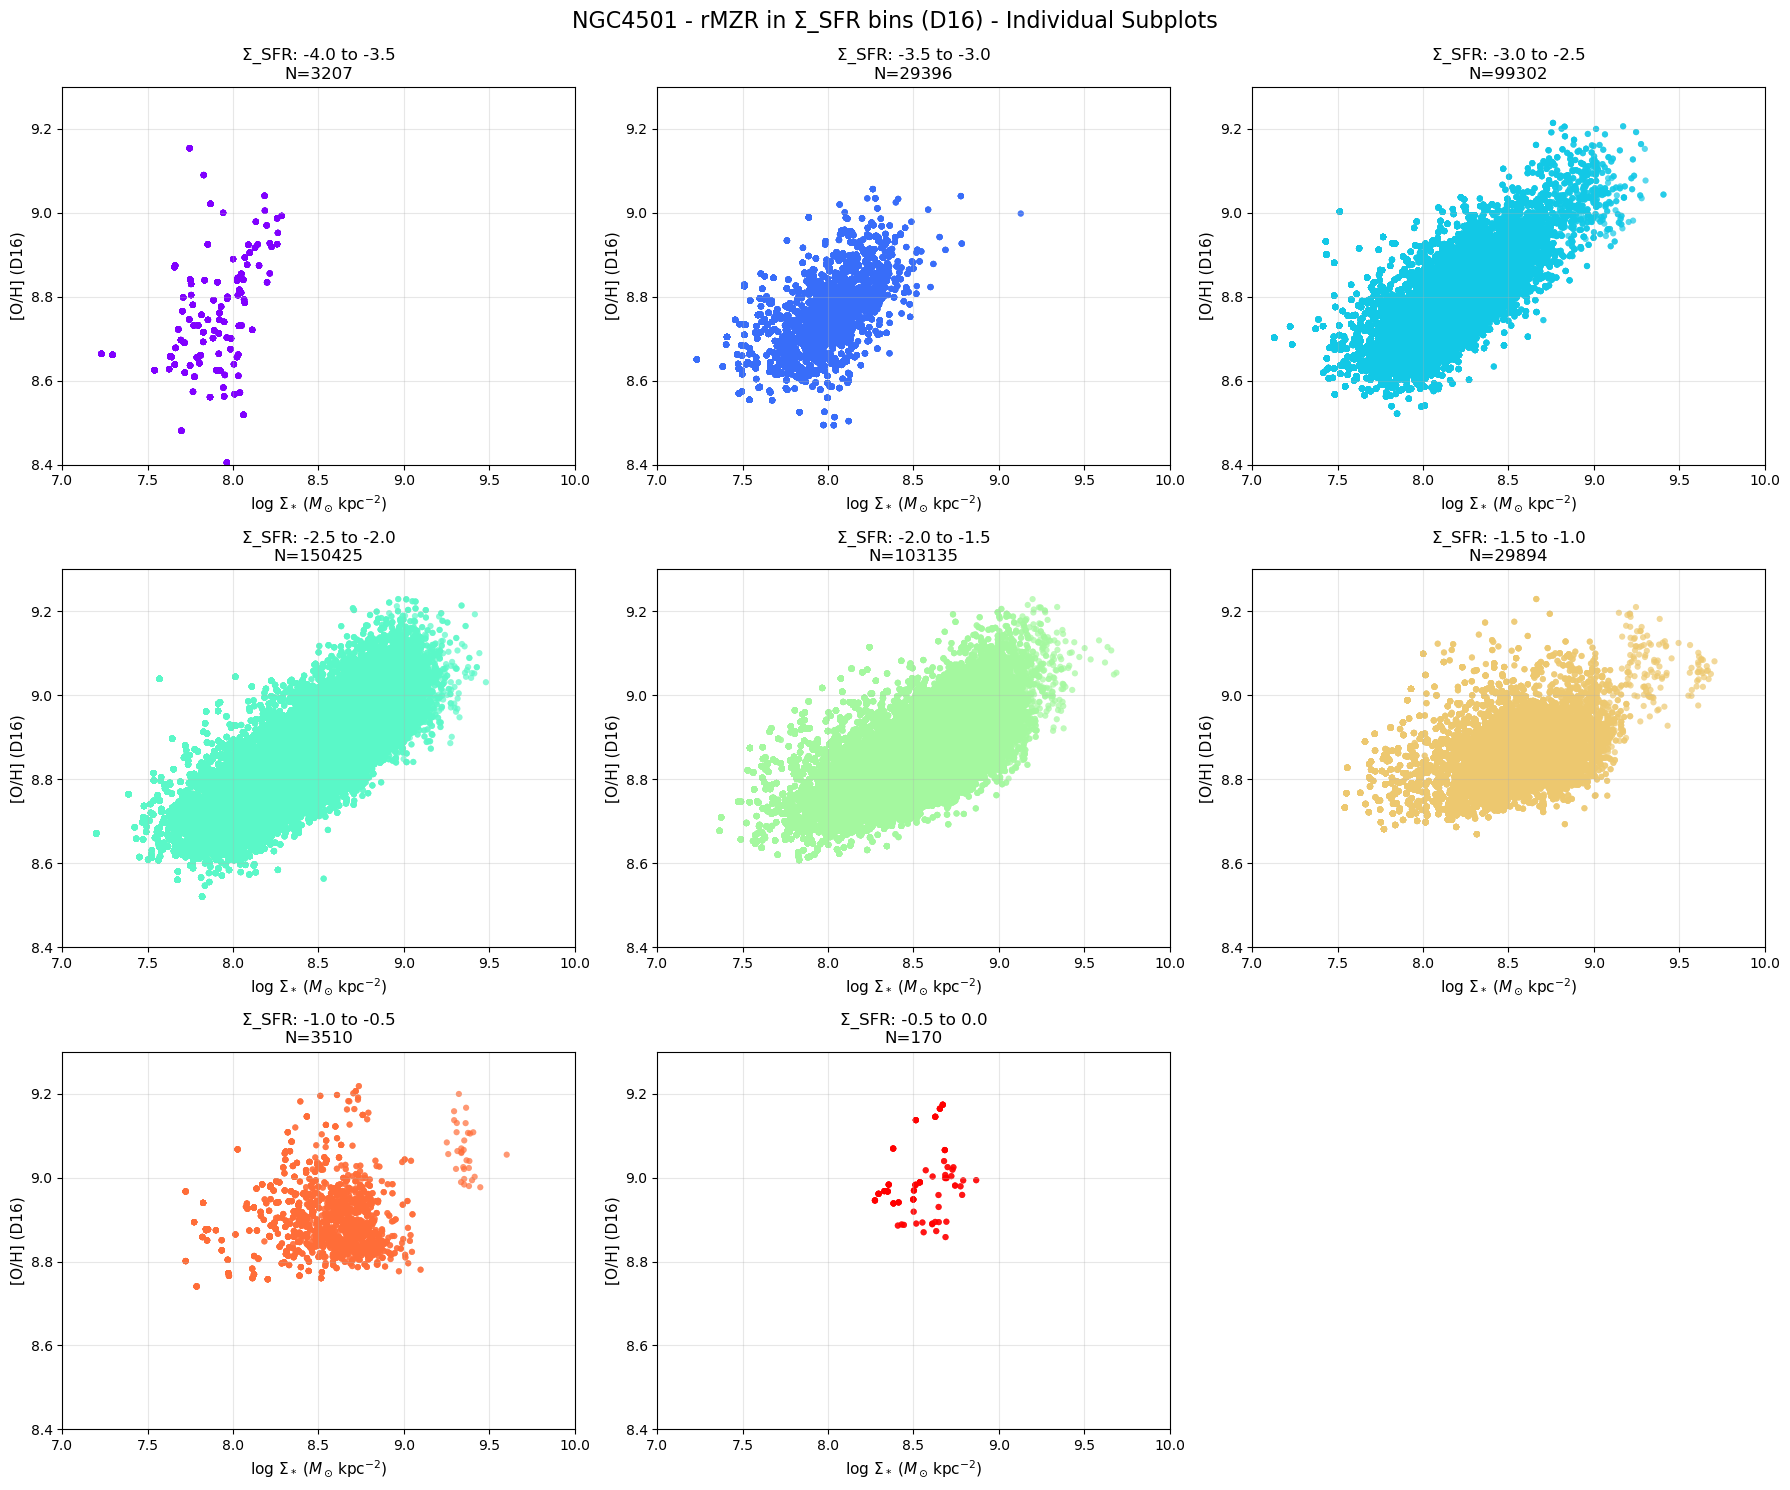

<Figure size 640x480 with 0 Axes>


Analysis complete for NGC4501 rMZR behavior in Σ_SFR bins with individual subplots (D16 only)


In [10]:
# ------------------------------------------------------------------
# NGC4501 rMZR behavior in Σ_SFR bins (D16 only) - Individual subplots
# Σ_SFR bins: -4 to 1 with 0.5 bin width, each bin in separate subplot
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and D16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_d16 = h['O_H_D16_SF'].data
    return sigM, sigSFR_SF, oh_d16

# Focus on NGC4501 only - D16 metallicity
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps
    logSigmaM, logSigmaSFR, oh_d16 = load_maps(gal)

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_d16) & np.isfinite(logSigmaSFR)
    
    logSigmaSFR_good = logSigmaSFR[good]
    oh_d16_good = oh_d16[good]
    
    # Define Σ_SFR bins: -4 to 1 with 0.5 bin width
    sfr_bin_edges = np.arange(-4, 0.5, 0.5)  # Creates bins: [-4, -3.5], [-3.5, -3], etc.
    sfr_bin_centers = sfr_bin_edges[:-1] + 0.25  # Center of each bin
    n_bins = len(sfr_bin_centers)
    
    print(f"Σ_SFR bins: {sfr_bin_edges}")
    print(f"Bin centers: {sfr_bin_centers}")
    
    # Colors for different bins
    colors = plt.cm.rainbow(np.linspace(0, 1, n_bins))
    
    # Create figure with subplots (3x3 grid to accommodate up to 9 bins)
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    # Also create combined plot
    fig_combined, ax_combined = plt.subplots(figsize=(12, 8))
    
    valid_bins = 0  # Counter for valid bins
    
    for i, (bin_start, bin_end) in enumerate(zip(sfr_bin_edges[:-1], sfr_bin_edges[1:])):
        # Select pixels in this Σ_SFR bin
        in_bin = (logSigmaSFR_good >= bin_start) & (logSigmaSFR_good < bin_end)
        n_pixels = np.sum(in_bin)
        
        if n_pixels < 10:  # Skip bins with too few pixels
            print(f"Bin {bin_start:.1f} to {bin_end:.1f}: only {n_pixels} pixels, skipping")
            continue
            
        # Get data for this bin
        x_bin = logSigmaM[good][in_bin]
        y_bin = oh_d16_good[in_bin]
        
        # Plot in individual subplot
        if valid_bins < len(axes):
            ax = axes[valid_bins]
            ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')
            
            ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=11)
            ax.set_ylabel(r'[O/H] (D16)', fontsize=11)
            ax.set_title(f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f}\nN={n_pixels}', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.set_xlim(7, 10)
            ax.set_ylim(8.4, 9.3)
        
        # Add to combined plot
        ax_combined.scatter(x_bin, y_bin, c=[colors[i]], s=15, alpha=0.6, 
                          label=f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f} (N={n_pixels})',
                          edgecolors='none')
        
        print(f"Bin {bin_start:.1f} to {bin_end:.1f}: N={n_pixels} pixels")
        valid_bins += 1
    
    # Hide unused subplots
    for j in range(valid_bins, len(axes)):
        axes[j].set_visible(False)
    
    # Format subplot figure
    plt.figure(fig.number)
    plt.suptitle(f'{gal} - rMZR in Σ_SFR bins (D16) - Individual Subplots', fontsize=16, y=0.99)
    plt.tight_layout()
    plt.show()
    
    # Format combined plot
    plt.figure(fig_combined.number)
    ax_combined.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
    ax_combined.set_ylabel(r'[O/H] (D16)', fontsize=14)
    ax_combined.set_title(f'{gal} - rMZR in different Σ_SFR bins (D16) - Combined', fontsize=16)
    ax_combined.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_combined.grid(True, alpha=0.3)
    ax_combined.set_xlim(7, 10)
    ax_combined.set_ylim(8.4, 9.3)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Data files not found for {gal}")

print(f"\nAnalysis complete for {gal} rMZR behavior in Σ_SFR bins with individual subplots (D16 only)")

Σ_SFR bins: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0. ]
Bin centers: [-3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25]
Bin -4.0 to -3.5: N=3148 pixels
Bin -3.5 to -3.0: N=29396 pixels
Bin -3.0 to -2.5: N=99293 pixels
Bin -2.5 to -2.0: N=150445 pixels
Bin -2.0 to -1.5: N=103174 pixels
Bin -1.5 to -1.0: N=29915 pixels
Bin -1.0 to -0.5: N=3527 pixels
Bin -0.5 to 0.0: N=182 pixels


/var/folders/rm/clp89v210v32vh5vjt2kx7b80000gr/T/ipykernel_68553/2818992450.py:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')


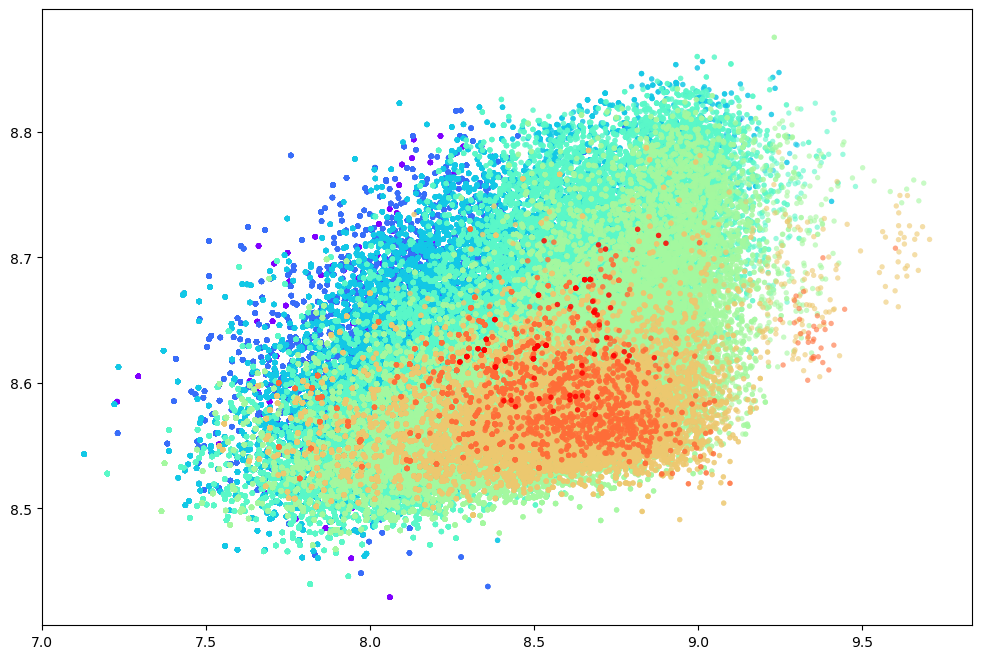

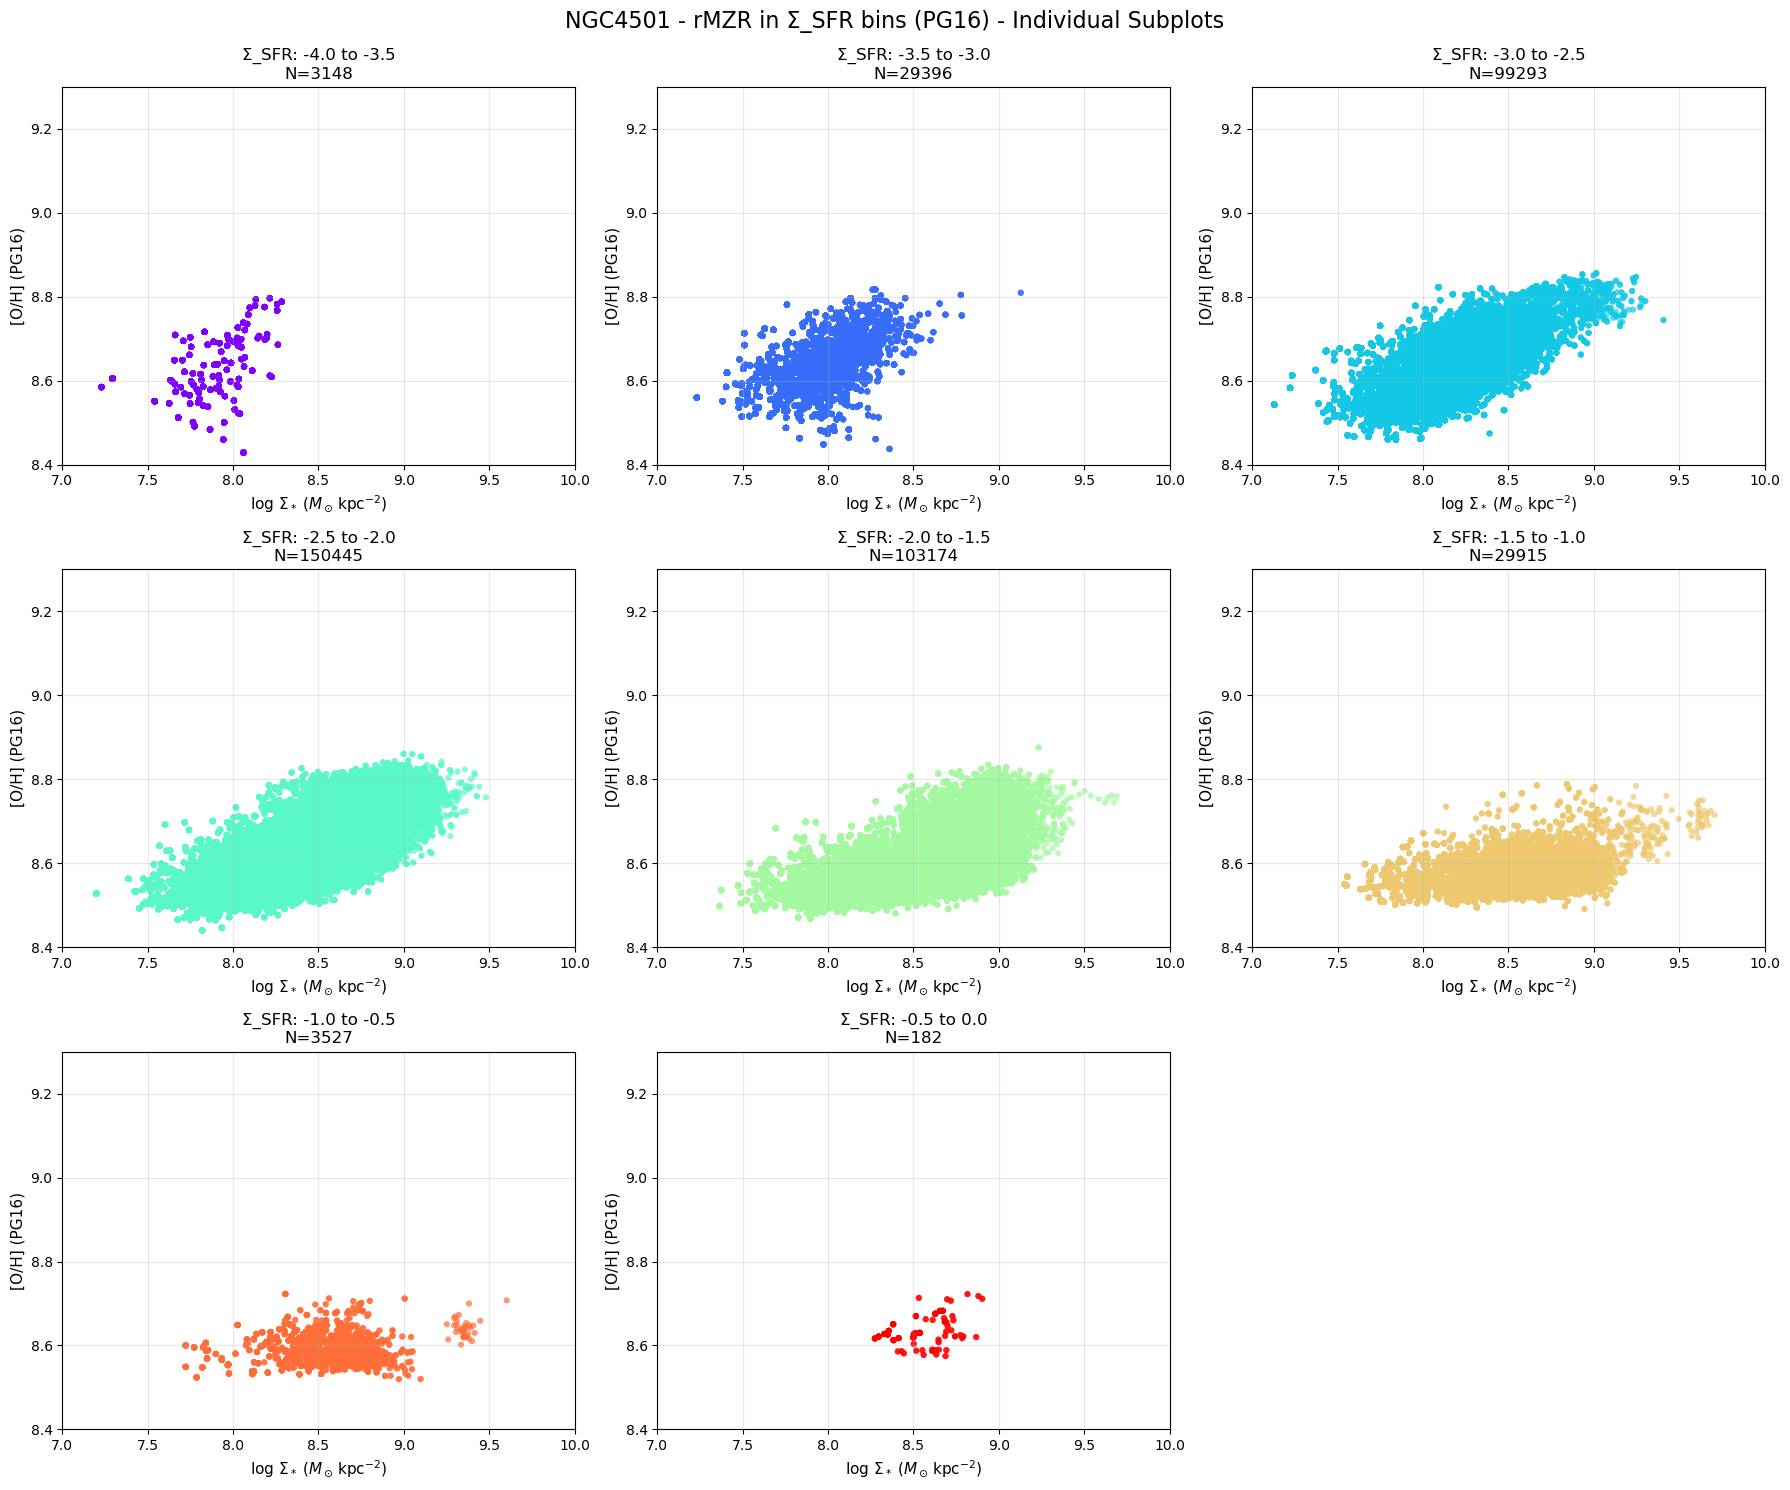

<Figure size 640x480 with 0 Axes>


Analysis complete for NGC4501 rMZR behavior in Σ_SFR bins with individual subplots (PG16 only)


In [11]:
# ------------------------------------------------------------------
# NGC4501 rMZR behavior in Σ_SFR bins (PG16 only) - Individual subplots
# Σ_SFR bins: -4 to 1 with 0.5 bin width, each bin in separate subplot
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and PG16 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_pg16 = h['O_H_PG16_SF'].data
    return sigM, sigSFR_SF, oh_pg16

# Focus on NGC4501 only - PG16 metallicity
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps
    logSigmaM, logSigmaSFR, oh_pg16 = load_maps(gal)

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_pg16) & np.isfinite(logSigmaSFR)
    
    logSigmaSFR_good = logSigmaSFR[good]
    oh_pg16_good = oh_pg16[good]
    
    # Define Σ_SFR bins: -4 to 1 with 0.5 bin width
    sfr_bin_edges = np.arange(-4, 0.5, 0.5)  # Creates bins: [-4, -3.5], [-3.5, -3], etc.
    sfr_bin_centers = sfr_bin_edges[:-1] + 0.25  # Center of each bin
    n_bins = len(sfr_bin_centers)
    
    print(f"Σ_SFR bins: {sfr_bin_edges}")
    print(f"Bin centers: {sfr_bin_centers}")
    
    # Colors for different bins
    colors = plt.cm.rainbow(np.linspace(0, 1, n_bins))
    
    # Create figure with subplots (3x3 grid to accommodate up to 9 bins)
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    # Also create combined plot
    fig_combined, ax_combined = plt.subplots(figsize=(12, 8))
    
    valid_bins = 0  # Counter for valid bins
    
    for i, (bin_start, bin_end) in enumerate(zip(sfr_bin_edges[:-1], sfr_bin_edges[1:])):
        # Select pixels in this Σ_SFR bin
        in_bin = (logSigmaSFR_good >= bin_start) & (logSigmaSFR_good < bin_end)
        n_pixels = np.sum(in_bin)
        
        if n_pixels < 10:  # Skip bins with too few pixels
            print(f"Bin {bin_start:.1f} to {bin_end:.1f}: only {n_pixels} pixels, skipping")
            continue
            
        # Get data for this bin
        x_bin = logSigmaM[good][in_bin]
        y_bin = oh_pg16_good[in_bin]
        
        # Plot in individual subplot
        if valid_bins < len(axes):
            ax = axes[valid_bins]
            ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')
            
            ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=11)
            ax.set_ylabel(r'[O/H] (PG16)', fontsize=11)
            ax.set_title(f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f}\nN={n_pixels}', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.set_xlim(7, 10)
            ax.set_ylim(8.4, 9.3)
        
        # Add to combined plot
        ax_combined.scatter(x_bin, y_bin, c=[colors[i]], s=15, alpha=0.6, 
                          label=f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f} (N={n_pixels})',
                          edgecolors='none')
        
        print(f"Bin {bin_start:.1f} to {bin_end:.1f}: N={n_pixels} pixels")
        valid_bins += 1
    
    # Hide unused subplots
    for j in range(valid_bins, len(axes)):
        axes[j].set_visible(False)
    
    # Format subplot figure
    plt.figure(fig.number)
    plt.suptitle(f'{gal} - rMZR in Σ_SFR bins (PG16) - Individual Subplots', fontsize=16, y=0.99)
    plt.tight_layout()
    plt.show()
    
    # Format combined plot
    plt.figure(fig_combined.number)
    ax_combined.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
    ax_combined.set_ylabel(r'[O/H] (PG16)', fontsize=14)
    ax_combined.set_title(f'{gal} - rMZR in different Σ_SFR bins (PG16) - Combined', fontsize=16)
    ax_combined.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_combined.grid(True, alpha=0.3)
    ax_combined.set_xlim(7, 10)
    ax_combined.set_ylim(8.4, 9.3)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Data files not found for {gal}")

print(f"\nAnalysis complete for {gal} rMZR behavior in Σ_SFR bins with individual subplots (PG16 only)")

Σ_SFR bins: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0. ]
Bin centers: [-3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25]
Bin -4.0 to -3.5: N=3229 pixels
Bin -3.5 to -3.0: N=29396 pixels
Bin -3.0 to -2.5: N=99304 pixels
Bin -2.5 to -2.0: N=150448 pixels
Bin -2.0 to -1.5: N=103174 pixels
Bin -1.5 to -1.0: N=29915 pixels
Bin -1.0 to -0.5: N=3527 pixels
Bin -0.5 to 0.0: N=182 pixels
Bin -2.0 to -1.5: N=103174 pixels
Bin -1.5 to -1.0: N=29915 pixels
Bin -1.0 to -0.5: N=3527 pixels
Bin -0.5 to 0.0: N=182 pixels


/var/folders/rm/clp89v210v32vh5vjt2kx7b80000gr/T/ipykernel_68553/2524055240.py:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')


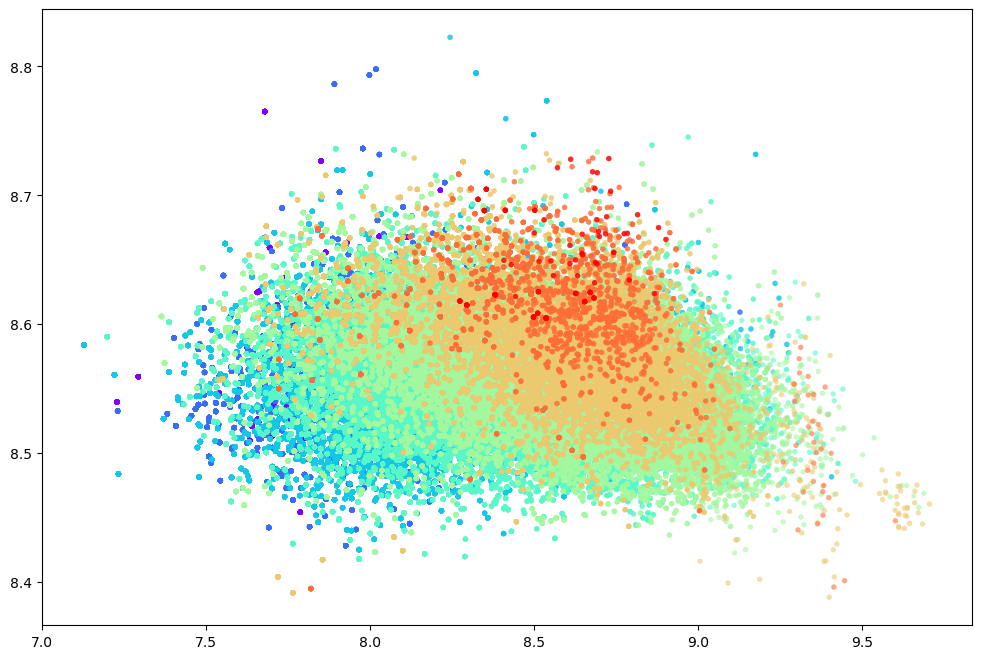

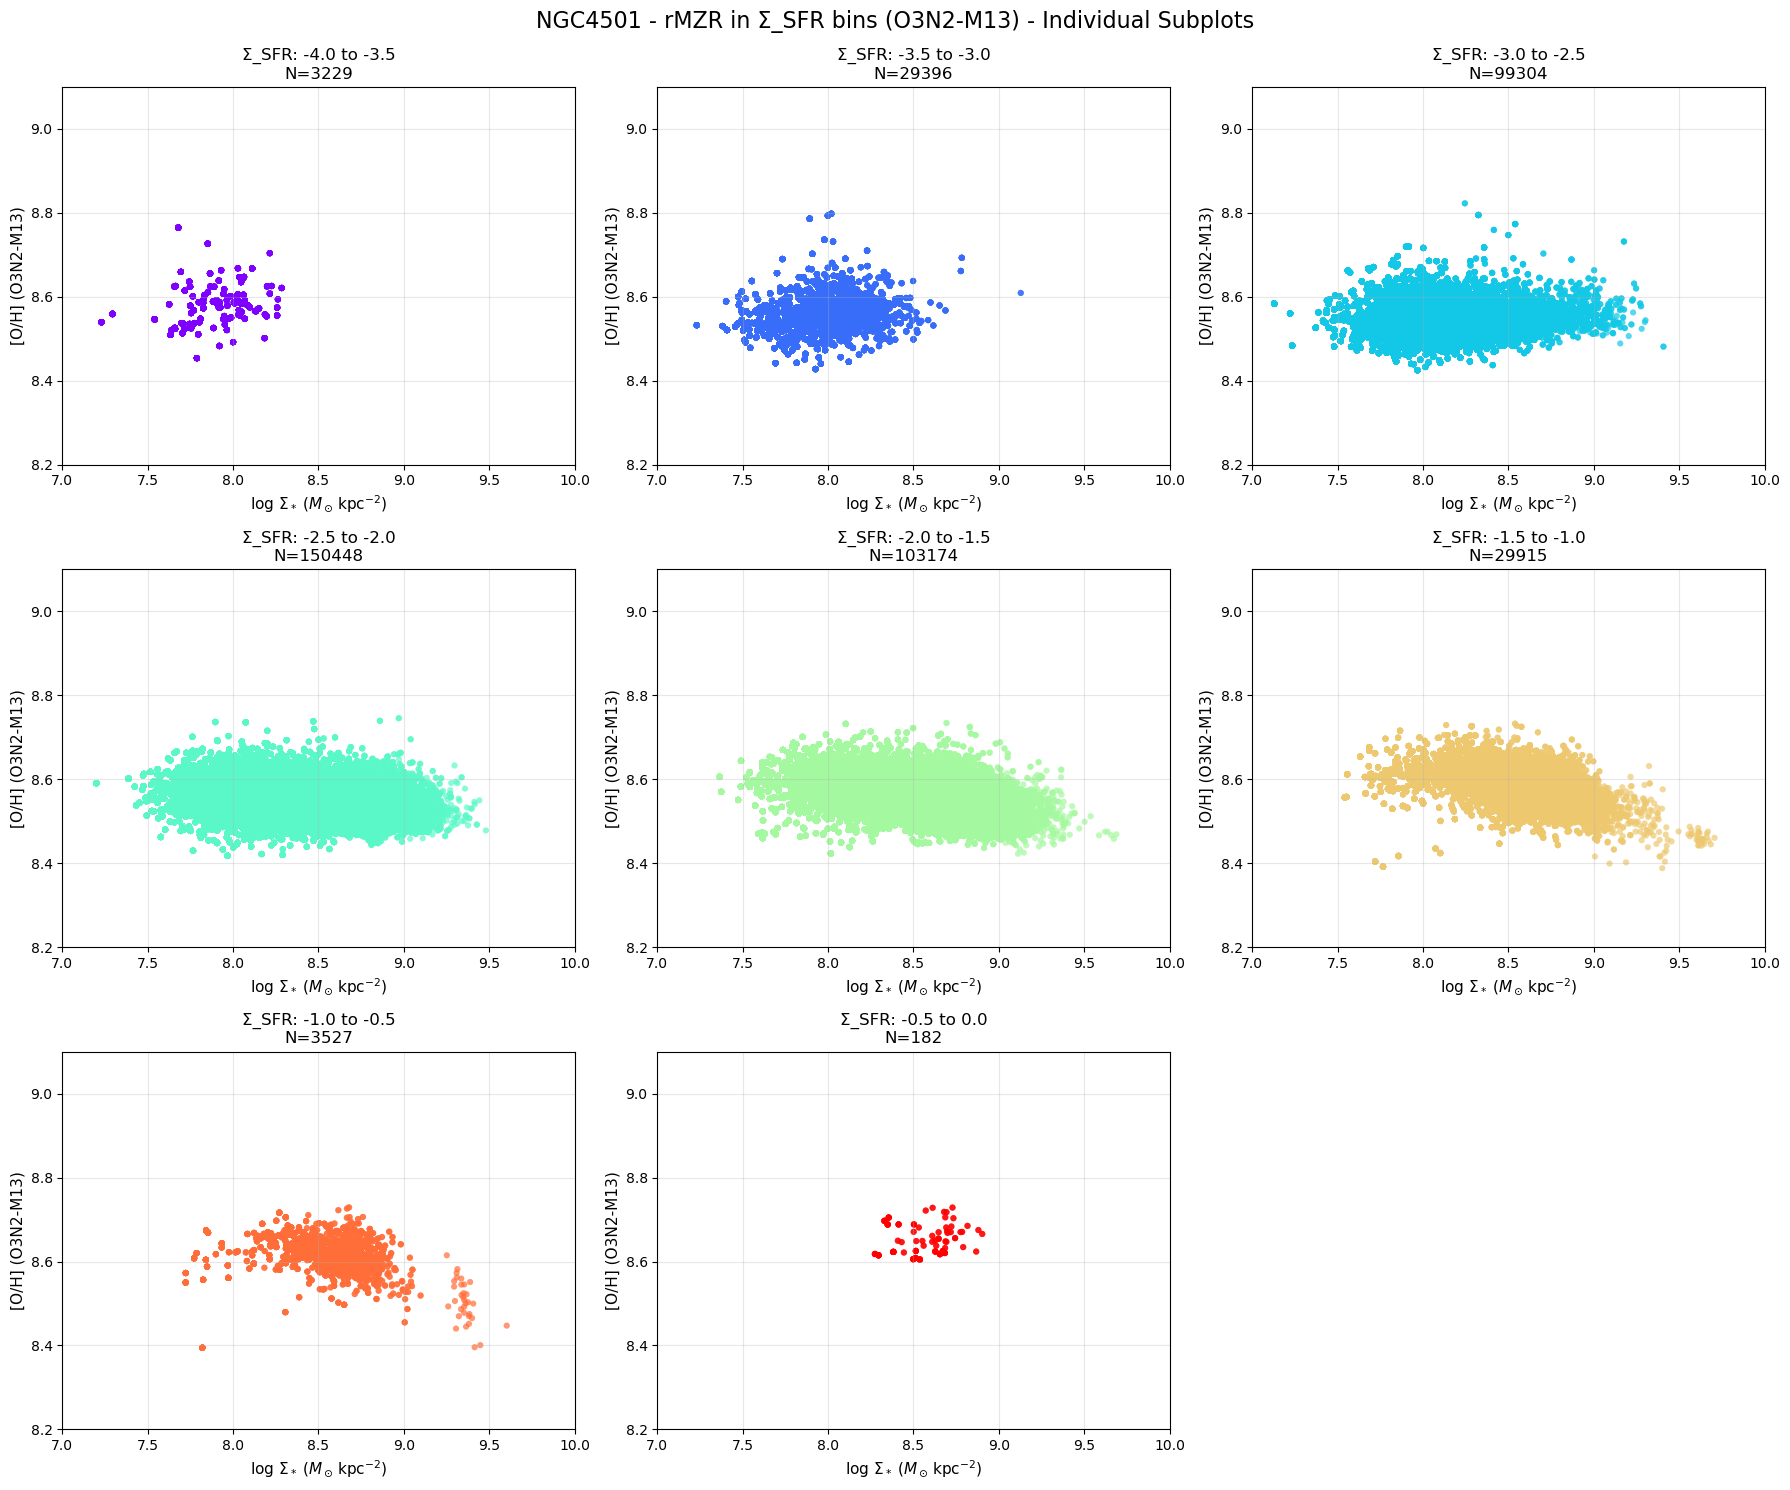

<Figure size 640x480 with 0 Axes>


Analysis complete for NGC4501 rMZR behavior in Σ_SFR bins with individual subplots (O3N2-M13 only)


In [12]:
# ------------------------------------------------------------------
# NGC4501 rMZR behavior in Σ_SFR bins (O3N2-M13 only) - Individual subplots
# Σ_SFR bins: -4 to 1 with 0.5 bin width, each bin in separate subplot
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and O3N2-M13 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_o3n2_m13 = h['O_H_O3N2_M13_SF'].data
    return sigM, sigSFR_SF, oh_o3n2_m13

# Focus on NGC4501 only - O3N2-M13 metallicity
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps
    logSigmaM, logSigmaSFR, oh_o3n2_m13 = load_maps(gal)

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_o3n2_m13) & np.isfinite(logSigmaSFR)
    
    logSigmaSFR_good = logSigmaSFR[good]
    oh_o3n2_m13_good = oh_o3n2_m13[good]
    
    # Define Σ_SFR bins: -4 to 1 with 0.5 bin width
    sfr_bin_edges = np.arange(-4, 0.5, 0.5)  # Creates bins: [-4, -3.5], [-3.5, -3], etc.
    sfr_bin_centers = sfr_bin_edges[:-1] + 0.25  # Center of each bin
    n_bins = len(sfr_bin_centers)
    
    print(f"Σ_SFR bins: {sfr_bin_edges}")
    print(f"Bin centers: {sfr_bin_centers}")
    
    # Colors for different bins
    colors = plt.cm.rainbow(np.linspace(0, 1, n_bins))
    
    # Create figure with subplots (3x3 grid to accommodate up to 9 bins)
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    # Also create combined plot
    fig_combined, ax_combined = plt.subplots(figsize=(12, 8))
    
    valid_bins = 0  # Counter for valid bins
    
    for i, (bin_start, bin_end) in enumerate(zip(sfr_bin_edges[:-1], sfr_bin_edges[1:])):
        # Select pixels in this Σ_SFR bin
        in_bin = (logSigmaSFR_good >= bin_start) & (logSigmaSFR_good < bin_end)
        n_pixels = np.sum(in_bin)
        
        if n_pixels < 10:  # Skip bins with too few pixels
            print(f"Bin {bin_start:.1f} to {bin_end:.1f}: only {n_pixels} pixels, skipping")
            continue
            
        # Get data for this bin
        x_bin = logSigmaM[good][in_bin]
        y_bin = oh_o3n2_m13_good[in_bin]
        
        # Plot in individual subplot
        if valid_bins < len(axes):
            ax = axes[valid_bins]
            ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')
            
            ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=11)
            ax.set_ylabel(r'[O/H] (O3N2-M13)', fontsize=11)
            ax.set_title(f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f}\nN={n_pixels}', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.set_xlim(7, 10)
            ax.set_ylim(8.2, 9.1)
        
        # Add to combined plot
        ax_combined.scatter(x_bin, y_bin, c=[colors[i]], s=15, alpha=0.6, 
                          label=f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f} (N={n_pixels})',
                          edgecolors='none')
        
        print(f"Bin {bin_start:.1f} to {bin_end:.1f}: N={n_pixels} pixels")
        valid_bins += 1
    
    # Hide unused subplots
    for j in range(valid_bins, len(axes)):
        axes[j].set_visible(False)
    
    # Format subplot figure
    plt.figure(fig.number)
    plt.suptitle(f'{gal} - rMZR in Σ_SFR bins (O3N2-M13) - Individual Subplots', fontsize=16, y=0.99)
    plt.tight_layout()
    plt.show()
    
    # Format combined plot
    plt.figure(fig_combined.number)
    ax_combined.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
    ax_combined.set_ylabel(r'[O/H] (O3N2-M13)', fontsize=14)
    ax_combined.set_title(f'{gal} - rMZR in different Σ_SFR bins (O3N2-M13) - Combined', fontsize=16)
    ax_combined.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_combined.grid(True, alpha=0.3)
    ax_combined.set_xlim(7, 10)
    ax_combined.set_ylim(8.2, 9.1)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Data files not found for {gal}")

print(f"\nAnalysis complete for {gal} rMZR behavior in Σ_SFR bins with individual subplots (O3N2-M13 only)")

Σ_SFR bins: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0. ]
Bin centers: [-3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25]
Bin -4.0 to -3.5: N=3229 pixels
Bin -3.5 to -3.0: N=29396 pixels
Bin -3.0 to -2.5: N=99304 pixels
Bin -2.5 to -2.0: N=150448 pixels
Bin -2.0 to -1.5: N=103174 pixels
Bin -1.5 to -1.0: N=29915 pixels
Bin -1.0 to -0.5: N=3527 pixels
Bin -0.5 to 0.0: N=182 pixels


/var/folders/rm/clp89v210v32vh5vjt2kx7b80000gr/T/ipykernel_68553/3436601180.py:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')


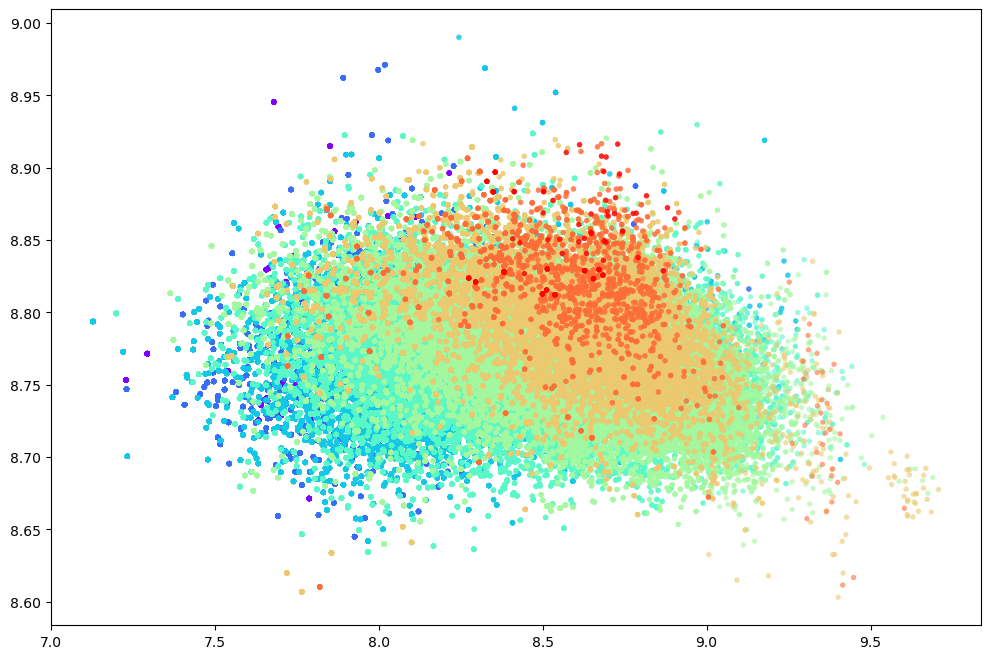

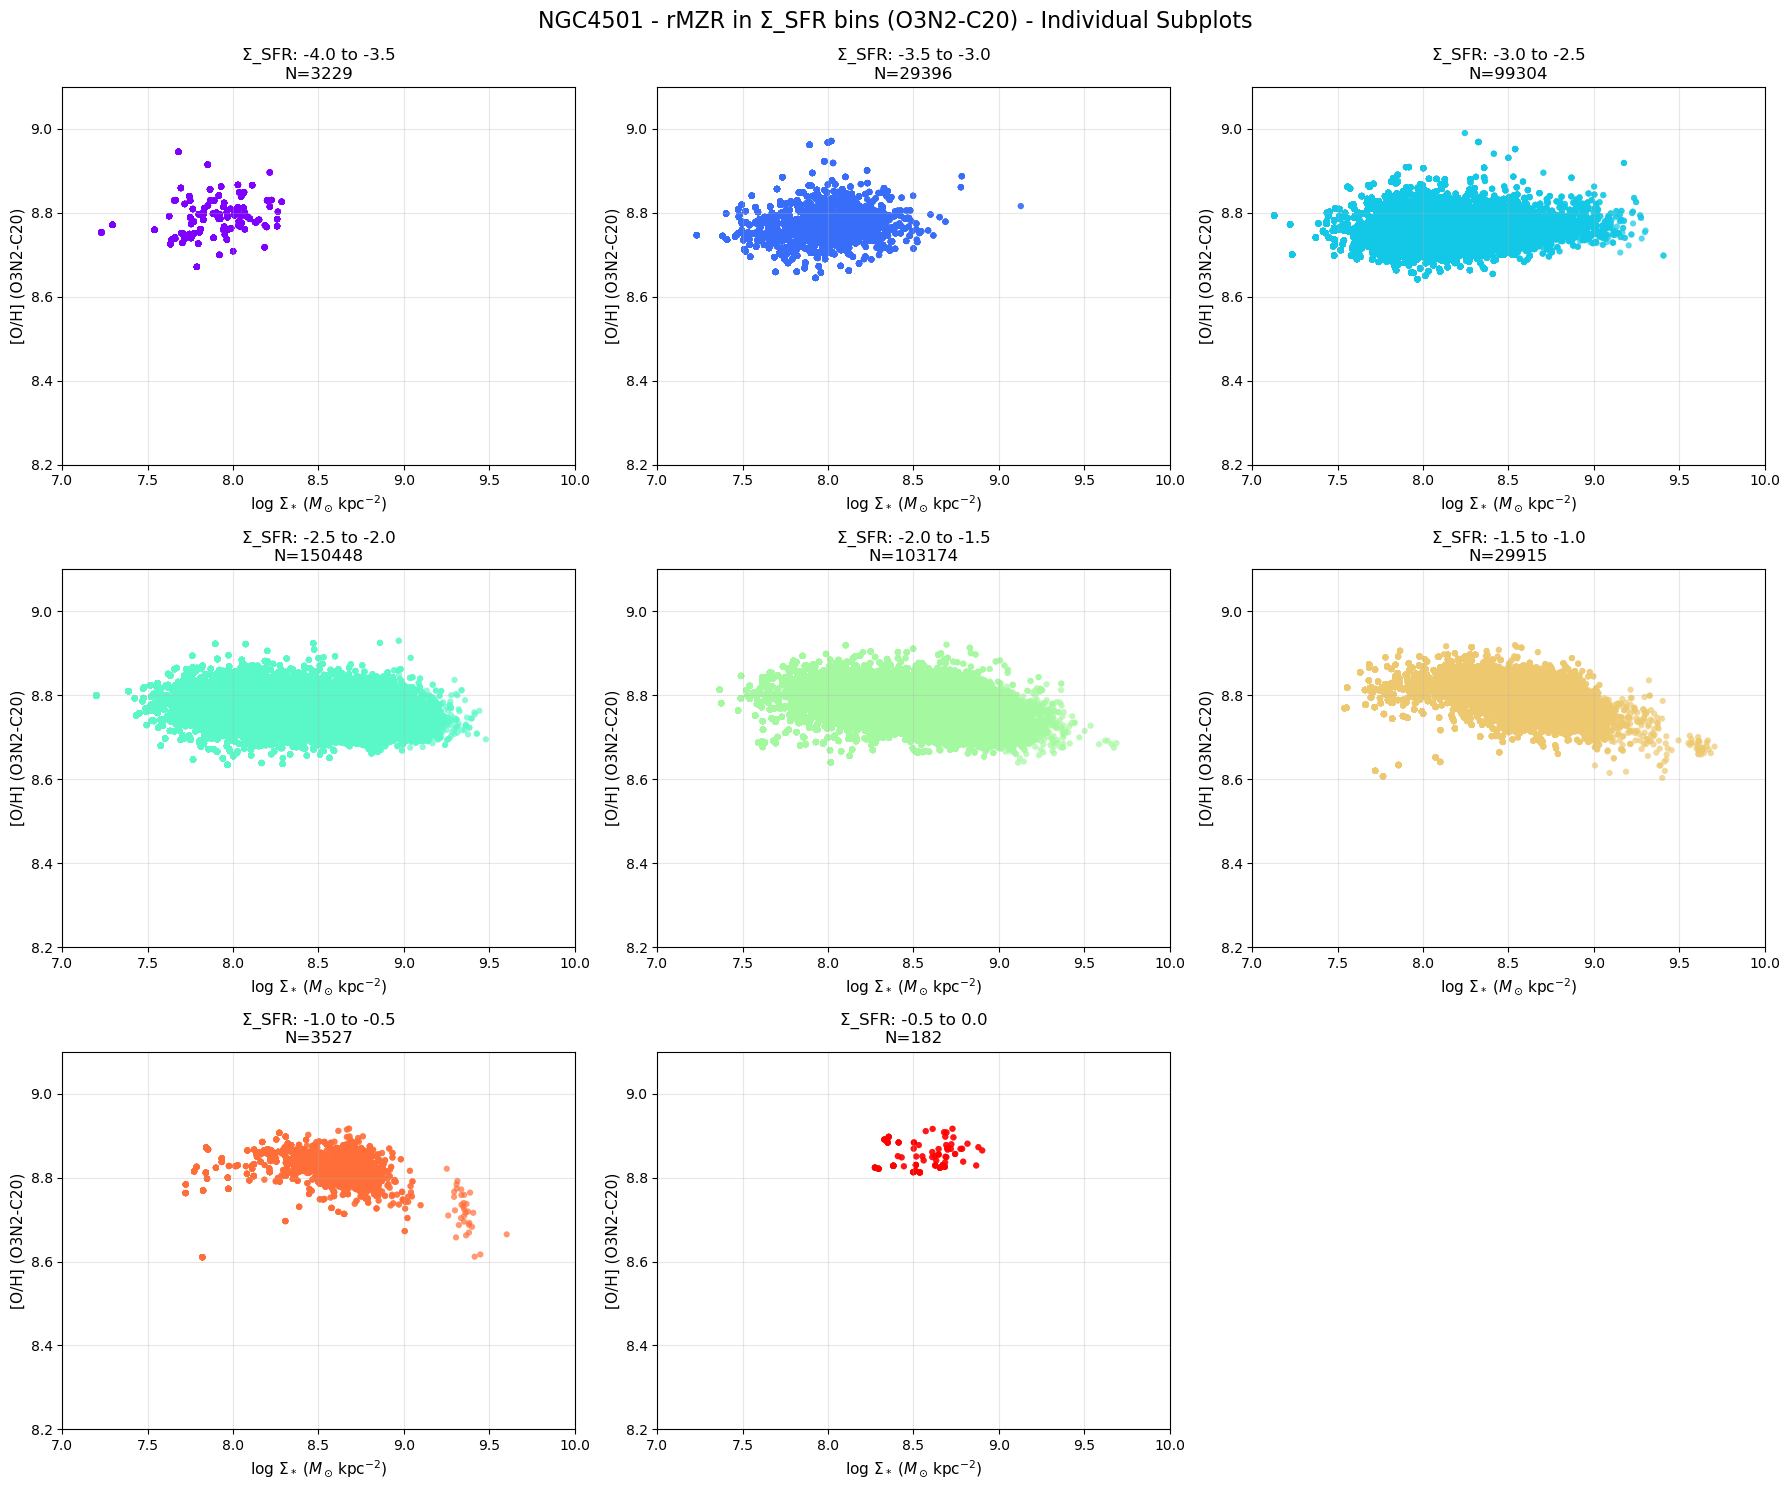

<Figure size 640x480 with 0 Axes>


Analysis complete for NGC4501 rMZR behavior in Σ_SFR bins with individual subplots (O3N2-C20 only)


In [13]:
# ------------------------------------------------------------------
# NGC4501 rMZR behavior in Σ_SFR bins (O3N2-C20 only) - Individual subplots
# Σ_SFR bins: -4 to 1 with 0.5 bin width, each bin in separate subplot
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits

def load_maps(gal):
    """Load stellar mass surface density, SFR surface density, and O3N2-C20 metallicity maps"""
    with fits.open(f'{gal}_SPATIAL_BINNING_maps_extended.fits') as h:
        sigM = h['LOGMASS_SURFACE_DENSITY'].data
    with fits.open(f'{gal}_gas_BIN_maps_extended.fits') as h:
        sigSFR_SF = h['LOGSFR_SURFACE_DENSITY_SF'].data
        oh_o3n2_c20 = h['O_H_O3N2_C20_SF'].data
    return sigM, sigSFR_SF, oh_o3n2_c20

# Focus on NGC4501 only - O3N2-C20 metallicity
gal = 'NGC4501'
bin_file = Path(f'{gal}_SPATIAL_BINNING_maps_extended.fits')
gas_file = Path(f'{gal}_gas_BIN_maps_extended.fits')

if bin_file.exists() and gas_file.exists():
    # Load maps
    logSigmaM, logSigmaSFR, oh_o3n2_c20 = load_maps(gal)

    # Mask bad pixels
    good = np.isfinite(logSigmaM) & np.isfinite(oh_o3n2_c20) & np.isfinite(logSigmaSFR)
    
    logSigmaSFR_good = logSigmaSFR[good]
    oh_o3n2_c20_good = oh_o3n2_c20[good]
    
    # Define Σ_SFR bins: -4 to 1 with 0.5 bin width
    sfr_bin_edges = np.arange(-4, 0.5, 0.5)  # Creates bins: [-4, -3.5], [-3.5, -3], etc.
    sfr_bin_centers = sfr_bin_edges[:-1] + 0.25  # Center of each bin
    n_bins = len(sfr_bin_centers)
    
    print(f"Σ_SFR bins: {sfr_bin_edges}")
    print(f"Bin centers: {sfr_bin_centers}")
    
    # Colors for different bins
    colors = plt.cm.rainbow(np.linspace(0, 1, n_bins))
    
    # Create figure with subplots (3x3 grid to accommodate up to 9 bins)
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    # Also create combined plot
    fig_combined, ax_combined = plt.subplots(figsize=(12, 8))
    
    valid_bins = 0  # Counter for valid bins
    
    for i, (bin_start, bin_end) in enumerate(zip(sfr_bin_edges[:-1], sfr_bin_edges[1:])):
        # Select pixels in this Σ_SFR bin
        in_bin = (logSigmaSFR_good >= bin_start) & (logSigmaSFR_good < bin_end)
        n_pixels = np.sum(in_bin)
        
        if n_pixels < 10:  # Skip bins with too few pixels
            print(f"Bin {bin_start:.1f} to {bin_end:.1f}: only {n_pixels} pixels, skipping")
            continue
            
        # Get data for this bin
        x_bin = logSigmaM[good][in_bin]
        y_bin = oh_o3n2_c20_good[in_bin]
        
        # Plot in individual subplot
        if valid_bins < len(axes):
            ax = axes[valid_bins]
            ax.scatter(x_bin, y_bin, c=colors[i], s=20, alpha=0.7, edgecolors='none')
            
            ax.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=11)
            ax.set_ylabel(r'[O/H] (O3N2-C20)', fontsize=11)
            ax.set_title(f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f}\nN={n_pixels}', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.set_xlim(7, 10)
            ax.set_ylim(8.2, 9.1)
        
        # Add to combined plot
        ax_combined.scatter(x_bin, y_bin, c=[colors[i]], s=15, alpha=0.6, 
                          label=f'Σ_SFR: {bin_start:.1f} to {bin_end:.1f} (N={n_pixels})',
                          edgecolors='none')
        
        print(f"Bin {bin_start:.1f} to {bin_end:.1f}: N={n_pixels} pixels")
        valid_bins += 1
    
    # Hide unused subplots
    for j in range(valid_bins, len(axes)):
        axes[j].set_visible(False)
    
    # Format subplot figure
    plt.figure(fig.number)
    plt.suptitle(f'{gal} - rMZR in Σ_SFR bins (O3N2-C20) - Individual Subplots', fontsize=16, y=0.99)
    plt.tight_layout()
    plt.show()
    
    # Format combined plot
    plt.figure(fig_combined.number)
    ax_combined.set_xlabel(r'$\log\,\Sigma_* \; (M_\odot\,\mathrm{kpc}^{-2})$', fontsize=14)
    ax_combined.set_ylabel(r'[O/H] (O3N2-C20)', fontsize=14)
    ax_combined.set_title(f'{gal} - rMZR in different Σ_SFR bins (O3N2-C20) - Combined', fontsize=16)
    ax_combined.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_combined.grid(True, alpha=0.3)
    ax_combined.set_xlim(7, 10)
    ax_combined.set_ylim(8.2, 9.1)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Data files not found for {gal}")

print(f"\nAnalysis complete for {gal} rMZR behavior in Σ_SFR bins with individual subplots (O3N2-C20 only)")